<a href="https://colab.research.google.com/github/mariaonz/traffic-accidents-analysis-2024/blob/main/traffic_accidents_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🚦Traffic Accident Analysis in Thailand (2024)

## 📥 Data Preprocessing

### 🎯 Objective:
ในขั้นตอนนี้ เราจะโหลดชุดข้อมูล `accident_file.csv` ซึ่งบันทึกข้อมูลอุบัติเหตุทางถนนในประเทศไทย  
โดยเน้นการวิเคราะห์เชิงเปรียบเทียบเพื่อหา pattern และปัจจัยที่เกี่ยวข้องกับความรุนแรง

ขั้นตอนประกอบด้วย:
1. การตั้งค่าฟอนต์ภาษาไทยสำหรับการแสดงผลกราฟ
2. การโหลดข้อมูล CSV จาก GitHub
3. การตรวจสอบโครงสร้างข้อมูลเบื้องต้นด้วย pandas

---

### 📄 Dataset Information:
- **Dataset Name**: `accident_file.csv`  
- **File Path**: `https://raw.githubusercontent.com/mariaonz/traffic-accidents-analysis-2024/main/accident_file.csv`
- **Source of data**: https://trams.mot.go.th/
- **Purpose**: ข้อมูลนี้ใช้สำหรับวิเคราะห์จำนวนอุบัติเหตุ ผู้บาดเจ็บ และผู้เสียชีวิต จำแนกตามมูลเหตุ ประเภทรถ พื้นที่ และช่วงเวลาในปี 2024

In [ ]:
# 📌 STEP 1: Load Thai font (Sarabun)
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm

# Add and set default font
font_path = "Sarabun-Regular.ttf"
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family=fm.FontProperties(fname=font_path).get_name())

# 📌 STEP 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

# 📌 STEP 3: Load Data
url = 'https://raw.githubusercontent.com/mariaonz/traffic-accidents-analysis-2024/main/accident_file.csv'
df = pd.read_csv(url)

# Preview the data
df.head()

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,สายทางหน่วยงาน,รหัสสายทาง,สายทาง,...,ยี่ห้อรถ,รหัสเพศ,เพศ,อายุ,รหัสจังหวัด,จังหวัดที่จดทะเบียน,หน่วยงานที่ซ้ำซ้อน,OBJ_CODE,OBJ_TYPE_CODE,รหัสลักษณะการเกิดอุบัติเหตุของหน่วยงาน
0,2024,01/01/2024,0:12:00,18/06/2024,14:23:00,9701543,กรมทางหลวง,ทางหลวง,4164,NaN,...,PROTON,1.0,ชาย,32.0,NaN,NaN,NaN,1.930700e+12,3.0,701
1,2024,01/01/2024,0:30:00,01/01/2024,12:13:00,8901889,กรมทางหลวง,ทางหลวง,106,ลี้ - ม่วงโตน,...,PROTON,1.0,ชาย,NaN,51.0,ลำพูน,NaN,NaN,3.0,705
2,2024,01/01/2024,0:30:00,02/01/2024,4:18:00,8902334,กรมทางหลวง,ทางหลวง,1143,น้ำคลาด - ปางหมิ่น,...,HONDA,2.0,หญิง,19.0,65.0,พิษณุโลก,NaN,NaN,3.0,701
3,2024,01/01/2024,0:30:00,01/01/2024,11:40:00,8902375,กรมทางหลวง,ทางหลวง,3390,หนองรี - บ่อยาง,...,YAMAHA,1.0,ชาย,50.0,NaN,NaN,NaN,NaN,3.0,5
4,2024,01/01/2024,0:30:00,02/01/2024,5:10:00,8902450,กรมทางหลวง,ทางหลวง,4021,เมืองภูเก็ต - ห้าแยกฉลอง,...,PROTON,2.0,หญิง,41.0,NaN,NaN,NaN,NaN,3.0,301


## 🗂️ Data Structure Summary

| หมวดหมู่            | ตัวแปรสำคัญ                          |
|----------------------|---------------------------------------|
| 🕒 ข้อมูลเวลา        | วันที่เกิดเหตุ, เวลาเกิดเหตุ, เวลาที่บันทึก |
| 📍 ตำแหน่งที่เกิดเหตุ | จังหวัด, อำเภอ, พิกัด LATITUDE, LONGITUDE |
| 🚗 รายละเอียดรถ      | ประเภทรถต้นเหตุ, ยี่ห้อ, รุ่น |
| 👤 ข้อมูลผู้เกี่ยวข้อง | เพศ, อายุ, ประเภทผู้ใช้ถนน |
| 🩺 ความรุนแรงของเหตุ | ผู้เสียชีวิต, ผู้บาดเจ็บสาหัส, บาดเจ็บเล็กน้อย |
| ⚠️ มูลเหตุ/สภาพแวดล้อม | มูลเหตุสันนิษฐาน, สภาพถนน, ลักษณะทาง, ประเภทบริเวณ |


## **PLOT1 จำนวนอุบัติเหตุ ผู้ได้รับบาดเจ็บ ผู้เสียชีวิตแยกตามภาค แยกตามจังหวัด**

<Axes: xlabel='ภาค', ylabel='ACC_CODE'>

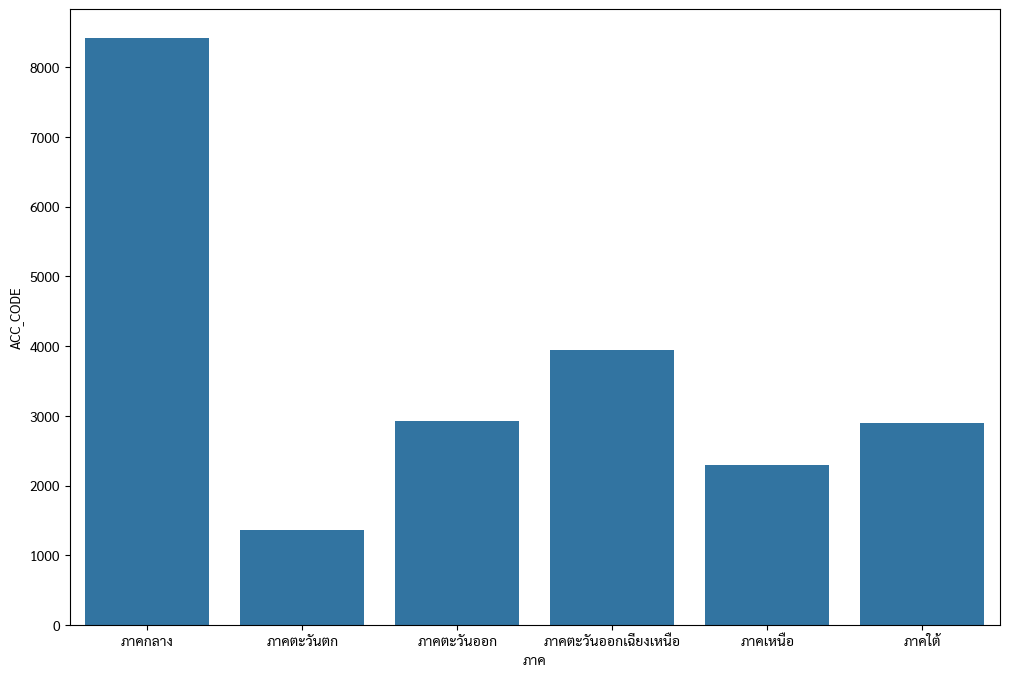

In [ ]:
t1_region_accident=df.pivot_table(index='ภาค',values='ACC_CODE',aggfunc='count')
plt.figure(figsize=(12,8))
sns.barplot(x=t1_region_accident.index, y='ACC_CODE',data=t1_region_accident) # Changed 'df' to 'data' and set x to t1_region_accident.index

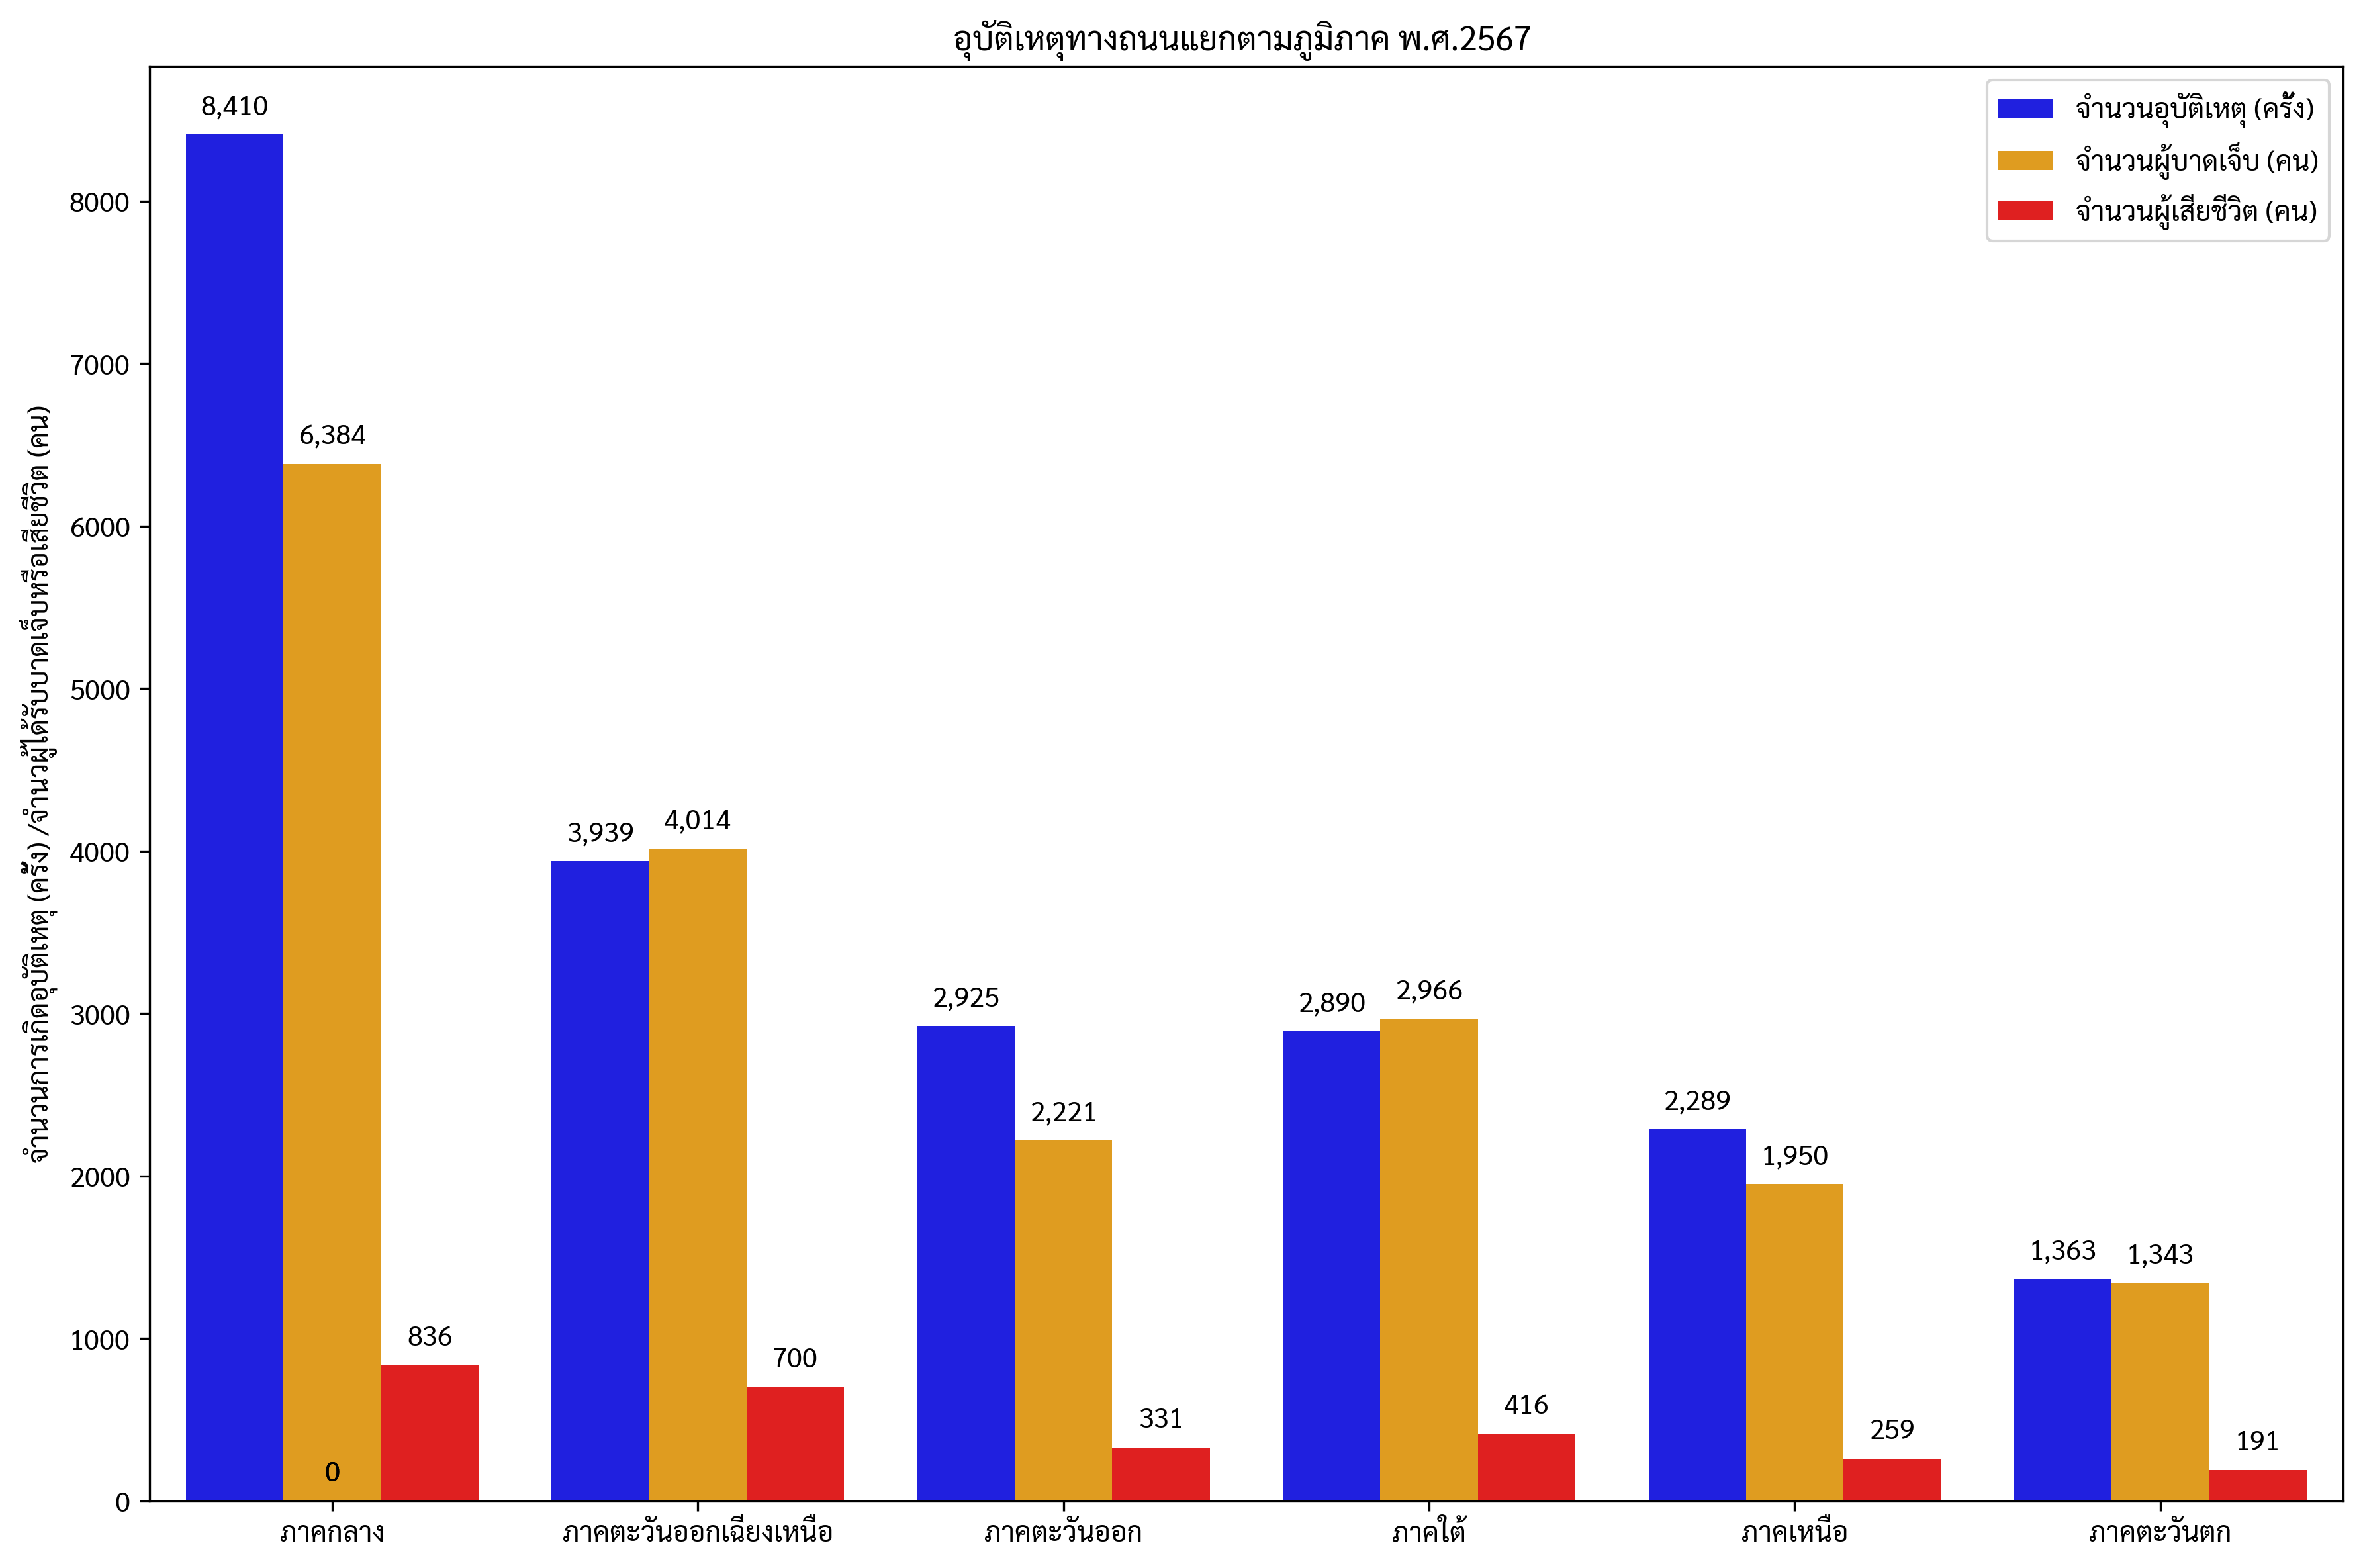

In [ ]:
#ใช้ กราฟรวมจำนวนการเกิดอุบัติเหตุ ผู้บาดเจ็บและเสียชีวิตแยกตามภาค
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Create the pivot table with the desired columns
region_data = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False)

# Reset index to make 'ภาค' a column
region_data = region_data.reset_index()

# Melt the DataFrame for easier plotting with Seaborn
melted_data = pd.melt(region_data, id_vars=['ภาค'],
                      value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                      var_name='Category', value_name='Value')

melted_data['Category'] = melted_data['Category'].replace({
    'ACC_CODE_Count': 'จำนวนอุบัติเหตุ (ครั้ง)',
    'Total_Injured': 'จำนวนผู้บาดเจ็บ (คน)',
    'Total_Deaths': 'จำนวนผู้เสียชีวิต (คน)'
})

# Create the bar plot using Seaborn
plt.figure(figsize=(12,8),dpi=300)
graph2 = sns.barplot(x='ภาค', y='Value', hue='Category', data=melted_data,
                     palette={'จำนวนอุบัติเหตุ (ครั้ง)': 'blue',
                              'จำนวนผู้บาดเจ็บ (คน)': 'orange',
                              'จำนวนผู้เสียชีวิต (คน)': 'red'})


for p in graph2.patches:
    graph2.annotate(f'{p.get_height():,.0f}',  # แสดงค่า y
                (p.get_x() + p.get_width() / 2., p.get_height()),  # ตำแหน่งที่จะวางข้อความ
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')


plt.title('อุบัติเหตุทางถนนแยกตามภูมิภาค พ.ศ.2567 ')
#plt.xlabel('Region')
plt.xlabel(None)
plt.ylabel('จำนวนการเกิดอุบัติเหตุ (ครั้ง) /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (คน)')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
graph2.legend(title=None)
plt.tight_layout()
plt.show()

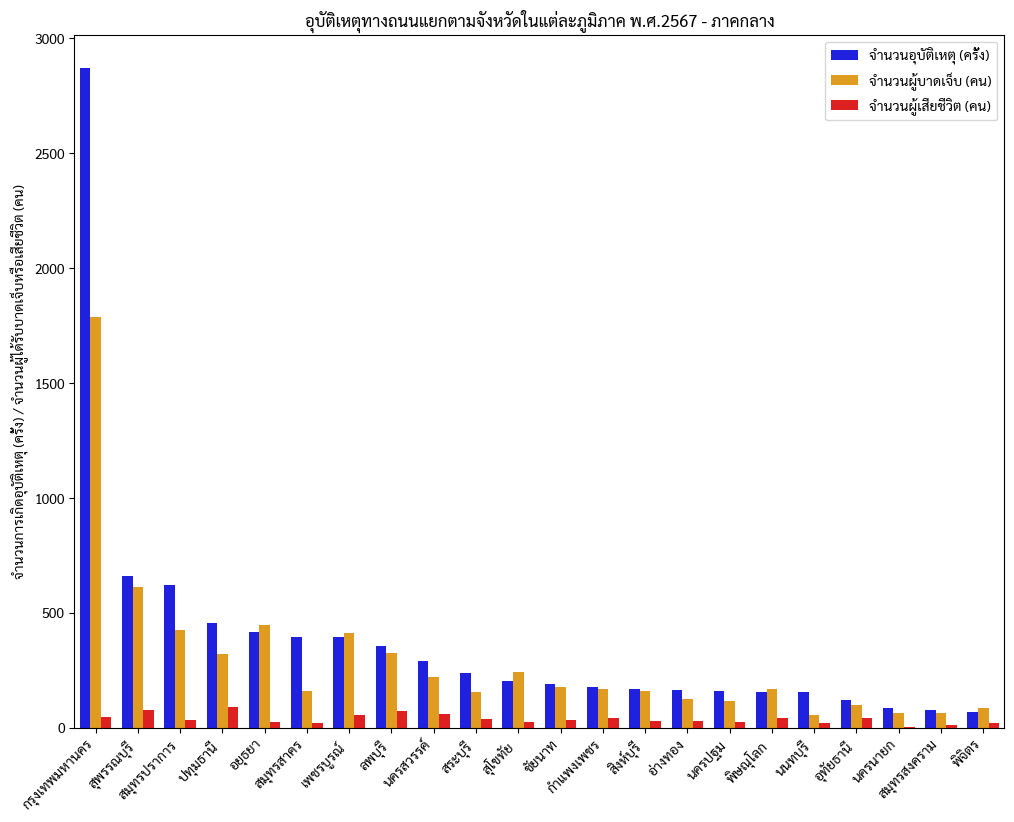

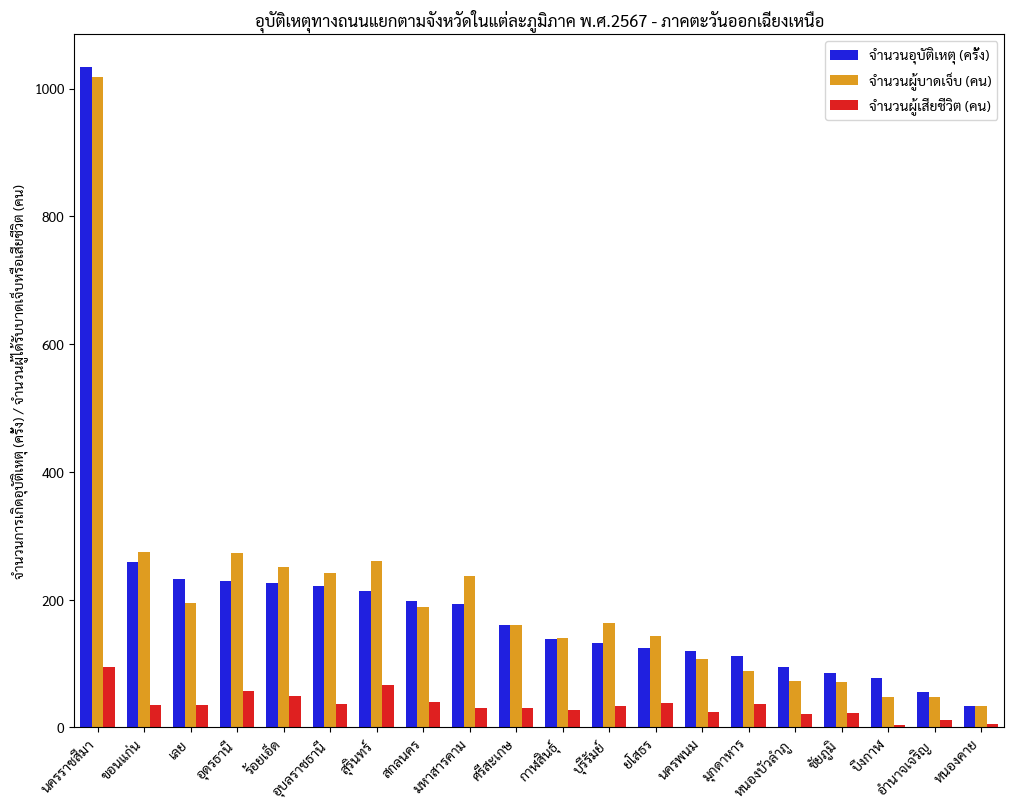

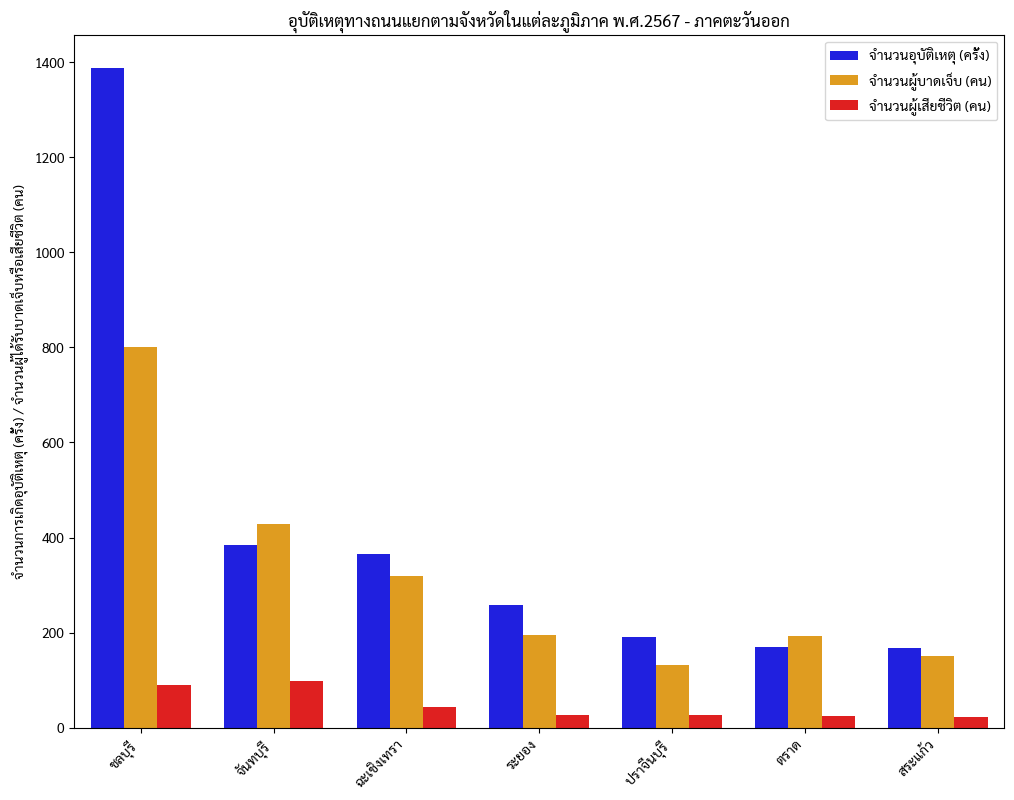

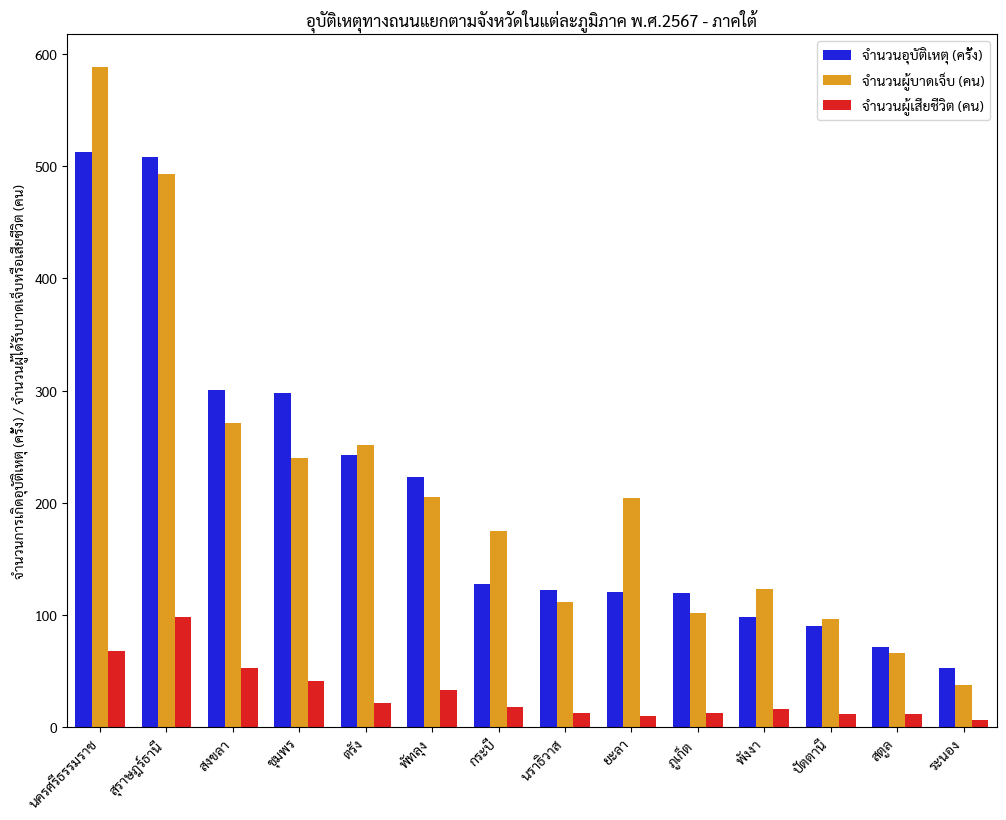

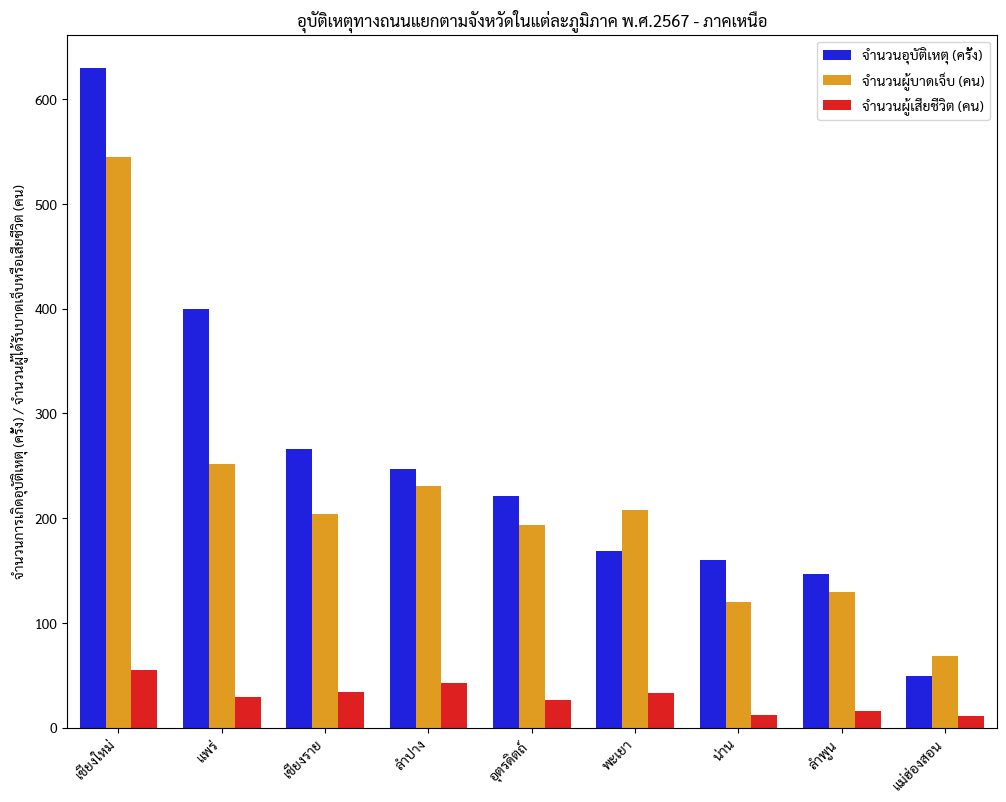

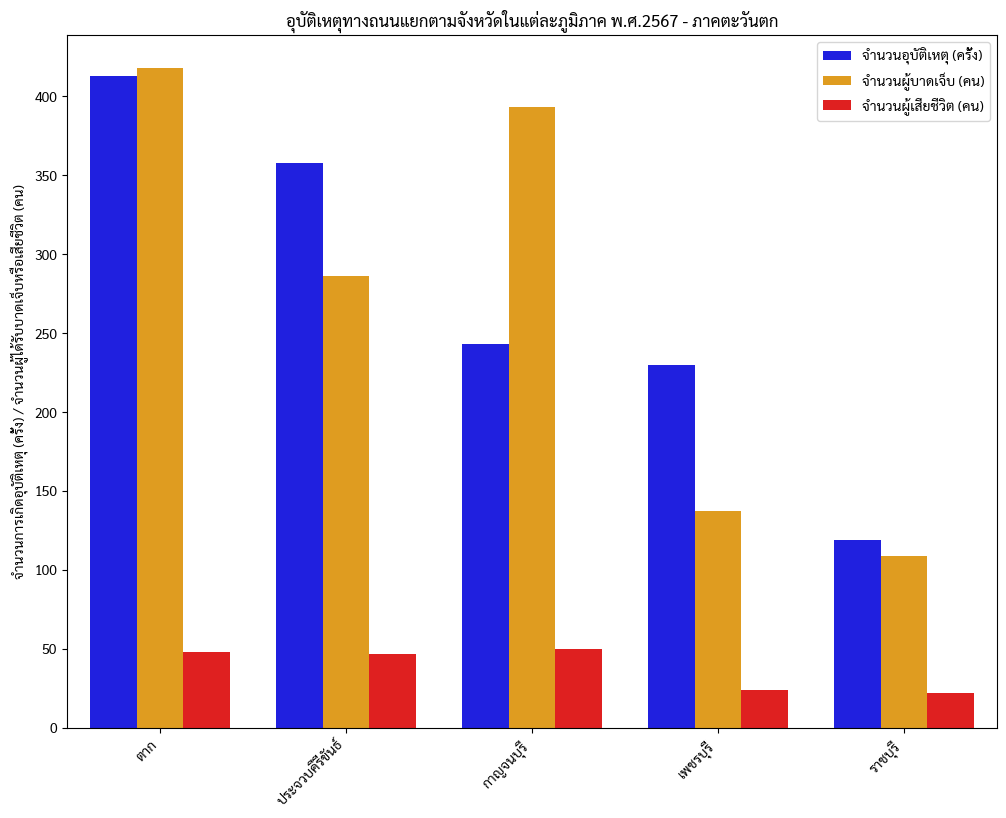

In [ ]:
#ใช้ กราฟรวมจำนวนการเกิดอุบัติเหตุ ผู้บาดเจ็บและเสียชีวิตแยกตามจังหวัดในแต่ละภาค
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# 1. Get unique regions

regions = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False).index.tolist()

# 2. Create subplots
# fig, axes = plt.subplots(len(regions), 1, figsize=(12, 8 * len(regions)), sharex=False)

# 3. Iterate through regions and plot
for i, region in enumerate(regions):
    region_data = df[df['ภาค'] == region]

    # Create pivot table with Total Injured and Total Deaths
    t2_region_accident = region_data.groupby('จังหวัด').agg(
        ACC_CODE_Count=('ACC_CODE', 'count'),
        Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
        Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
    )

    # Sort by ACC_CODE_Count in descending order
    t2_region_accident = t2_region_accident.sort_values(by='ACC_CODE_Count', ascending=False)

    # Reset index to make 'จังหวัด' a column
    t2_region_accident = t2_region_accident.reset_index()

    # Melt the DataFrame for easier plotting with Seaborn
    melted_data = pd.melt(t2_region_accident, id_vars=['จังหวัด'],
                          value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                          var_name='Category', value_name='Value')

    melted_data['Category'] = melted_data['Category'].replace({
    'ACC_CODE_Count': 'จำนวนอุบัติเหตุ (ครั้ง)',
    'Total_Injured': 'จำนวนผู้บาดเจ็บ (คน)',
    'Total_Deaths': 'จำนวนผู้เสียชีวิต (คน)'
    })

    # สร้าง figure ใหม่สำหรับแต่ละภูมิภาค
    plt.figure(figsize=(12, 9))

    # Create the bar plot using Seaborn
    sns.barplot(x='จังหวัด', y='Value', hue='Category', data=melted_data,
                palette={'จำนวนอุบัติเหตุ (ครั้ง)': 'blue',
                         'จำนวนผู้บาดเจ็บ (คน)': 'orange',
                         'จำนวนผู้เสียชีวิต (คน)': 'red'}, width=0.75).legend(title=None)

    plt.title(f'อุบัติเหตุทางถนนแยกตามจังหวัดในแต่ละภูมิภาค พ.ศ.2567 - {region}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.xlabel('')
    plt.ylabel('จำนวนการเกิดอุบัติเหตุ (ครั้ง) / จำนวนผู้ได้รับบาดเจ็บหรือเสียชีวิต (คน)')

    plt.show()
#plt.tight_layout()

## **PLOT2 จำนวนการเกิดอุบัติเหตุแยกตามช่วงเวลาใน 1 วัน**

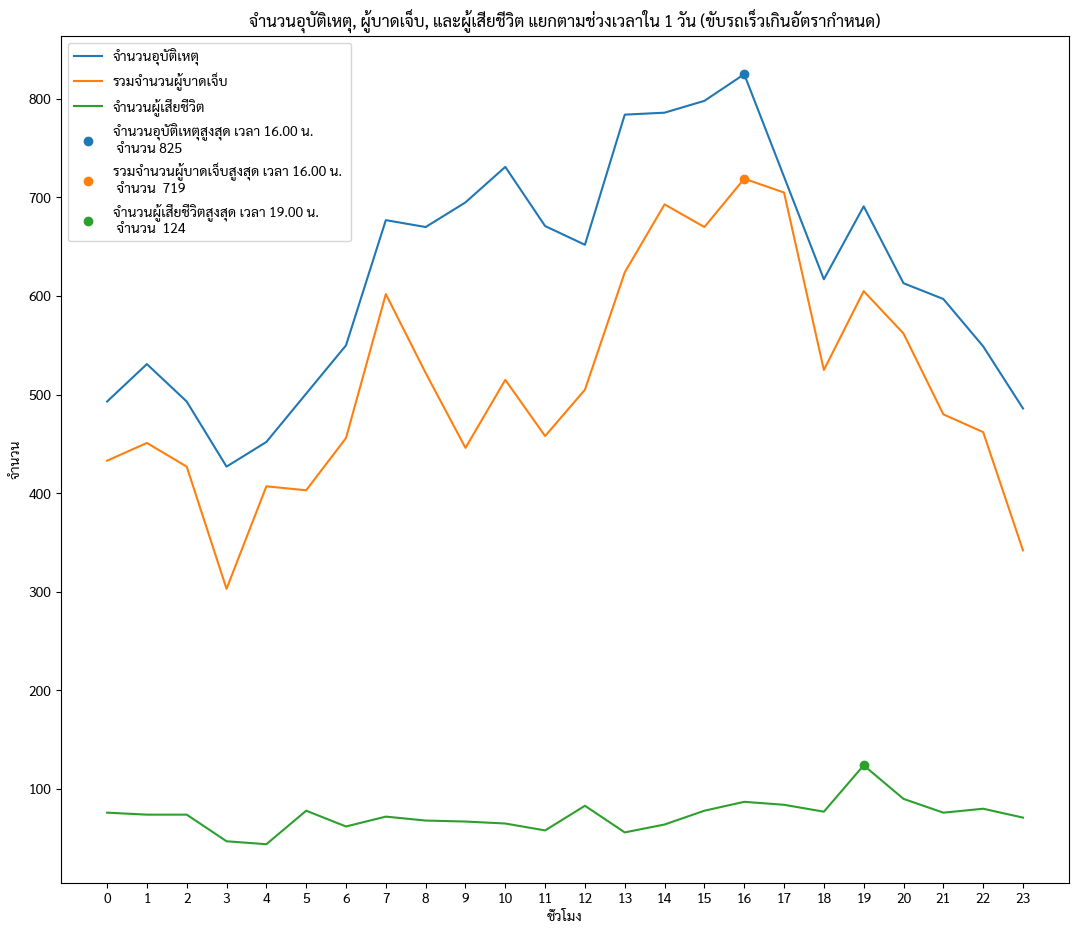

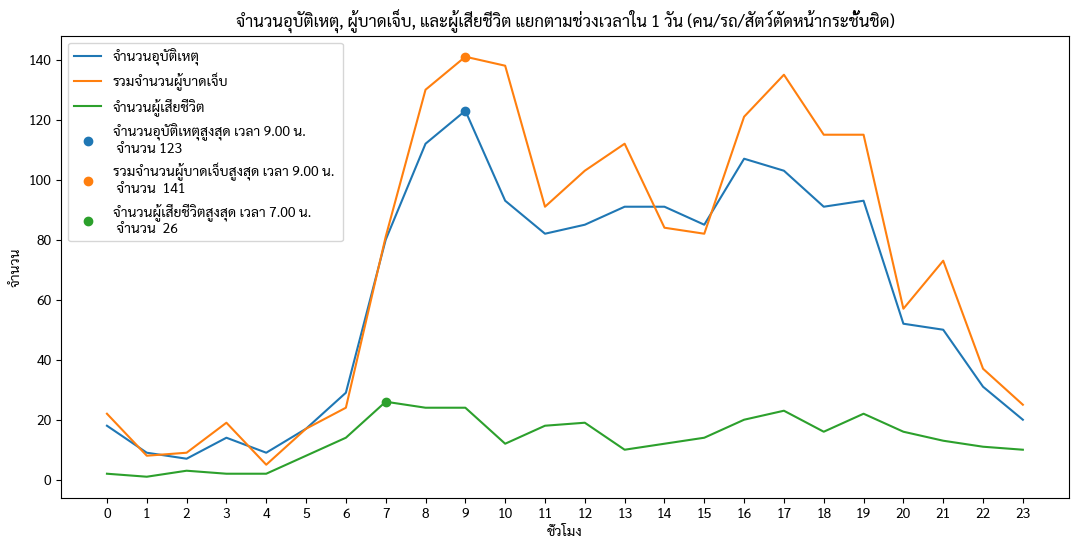

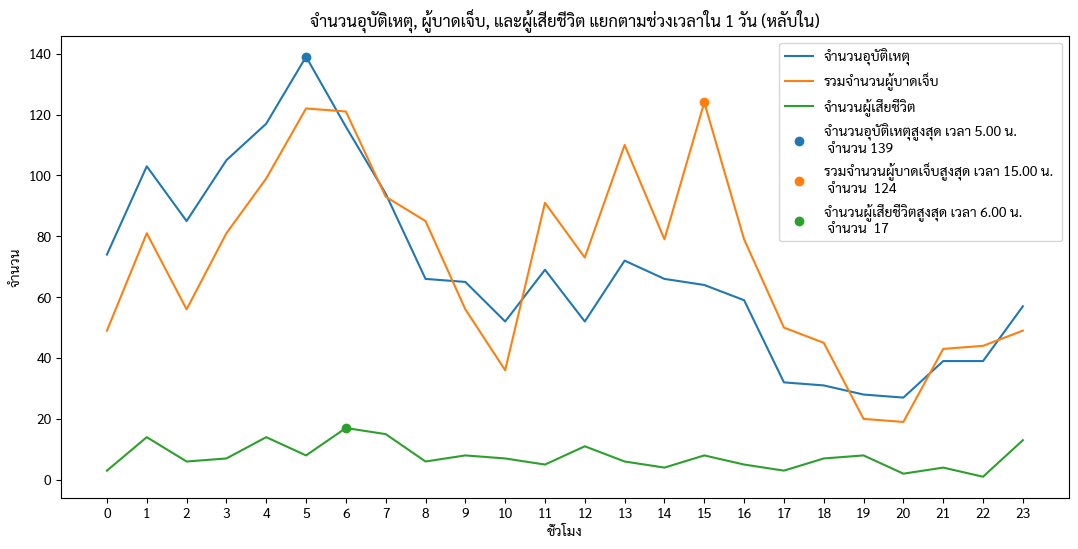

In [ ]:
# prompt: plot กราฟที่มี index ตามช่วงเวลาราย ชม ในคอลัมน์'เวลา' โดยมีค่า count'ACC_CODE' sum "รวมจำนวนผู้บาดเจ็บ' sum'จำนวนผู้เสียชีวิต'
_filter = ['ขับรถเร็วเกินอัตรากำหนด', 'คน/รถ/สัตว์ตัดหน้ากระชั้นชิด','หลับใน']
_filter

for filter in _filter:
  # Assuming 'df' is your DataFrame and 'เวลา' column contains time information.
  # Convert 'เวลา' to datetime objects if it's not already.

  df['เวลา'] = pd.to_datetime(df['เวลา'])

  # Extract hour from the 'เวลา' column
  df['Hour'] = df['เวลา'].dt.hour
  df_filtered = df[df['มูลเหตุสันนิษฐาน'] == filter]
  # Group by hour and calculate counts for ACC_CODE, sum of 'รวมจำนวนผู้บาดเจ็บ', and sum of 'จำนวนผู้เสียชีวิต'
  hourly_data = df_filtered.groupby('Hour').agg({
      'ACC_CODE': 'count',
      'รวมจำนวนผู้บาดเจ็บ': 'sum',
      'จำนวนผู้เสียชีวิต': 'sum'
  })
  max_acc = hourly_data['ACC_CODE'].idxmax()  # ชั่วโมงที่มีจำนวนอุบัติเหตุสูงสุด
  max_injured = hourly_data['รวมจำนวนผู้บาดเจ็บ'].idxmax()  # ชั่วโมงที่มีผู้บาดเจ็บสูงสุด
  max_death = hourly_data['จำนวนผู้เสียชีวิต'].idxmax()  # ชั่วโมงที่มีผู้เสียชีวิตสูงสุด
  # Create the plot
  if filter == 'ขับรถเร็วเกินอัตรากำหนด':
    plt.figure(figsize=(13, 11))
  else:
    plt.figure(figsize=(13, 6))
  plt.plot(hourly_data.index, hourly_data['ACC_CODE'], label='จำนวนอุบัติเหตุ')
  plt.plot(hourly_data.index, hourly_data['รวมจำนวนผู้บาดเจ็บ'], label='รวมจำนวนผู้บาดเจ็บ')
  plt.plot(hourly_data.index, hourly_data['จำนวนผู้เสียชีวิต'], label='จำนวนผู้เสียชีวิต')
  # เพิ่มจุดเด่นที่ค่ามากสุด
  plt.scatter(max_acc, hourly_data.loc[max_acc, 'ACC_CODE'], label=f"จำนวนอุบัติเหตุสูงสุด เวลา {max_acc}.00 น. \n จำนวน {hourly_data.loc[max_acc, 'ACC_CODE']}", zorder=3)
  plt.scatter(max_injured, hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ'], label=f"รวมจำนวนผู้บาดเจ็บสูงสุด เวลา {max_injured}.00 น. \n จำนวน  {hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ']}", zorder=3)
  plt.scatter(max_death, hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต'], label=f"จำนวนผู้เสียชีวิตสูงสุด เวลา {max_death}.00 น. \n จำนวน  {hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต']}", zorder=3)

  # plt.text(max_acc, hourly_data.loc[max_acc, 'ACC_CODE'], f"เวลา {max_acc}.00 \n จำนวน {hourly_data.loc[max_acc, 'ACC_CODE']}",
  #           ha='center', va='bottom', fontsize=10)

  # plt.text(max_injured, hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ'], f"เวลา {max_injured}.00 \n จำนวน  {hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ']}",
  #           ha='center', va='bottom', fontsize=10)

  # plt.text(max_death, hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต'], f"เวลา {max_death}.00 \n จำนวน  {hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต']}",
  #           ha='center', va='bottom', fontsize=10)
  plt.xlabel('ชั่วโมง')
  plt.ylabel('จำนวน')
  plt.title(f'จำนวนอุบัติเหตุ, ผู้บาดเจ็บ, และผู้เสียชีวิต แยกตามช่วงเวลาใน 1 วัน ({filter})')
  plt.legend()
  plt.xticks(range(24))  # Show ticks for each hour
  plt.grid(False)
  plt.show()


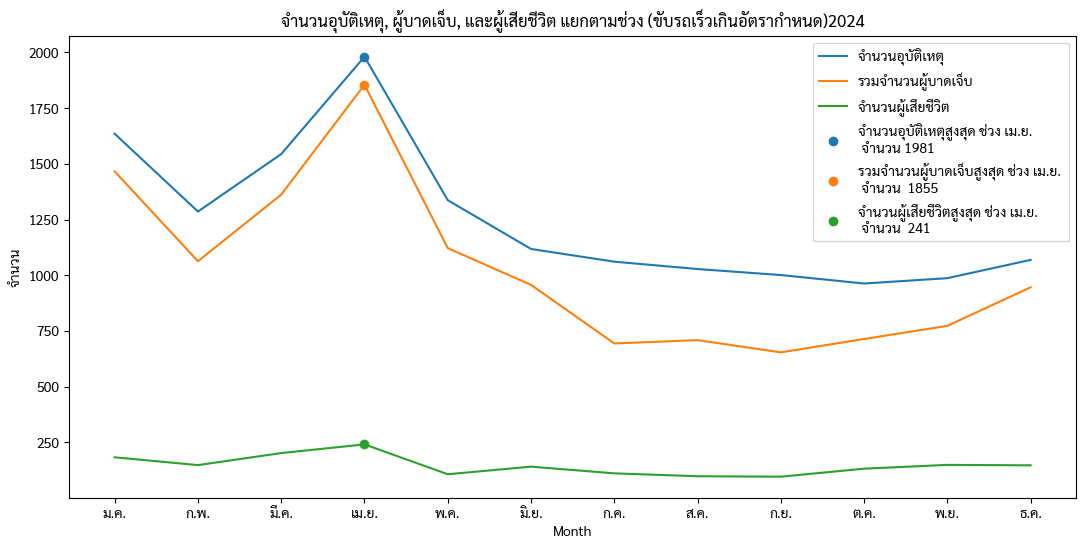

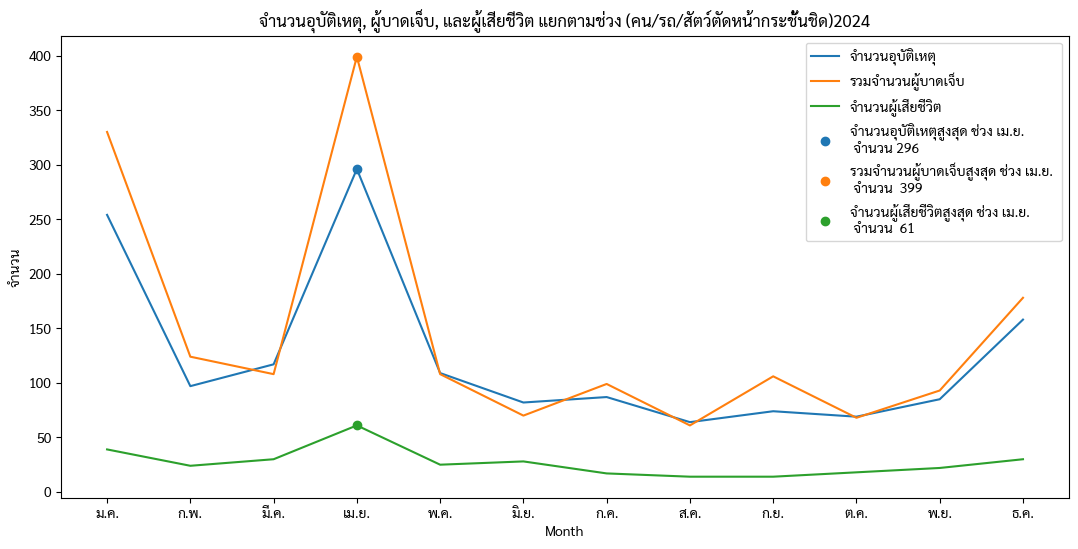

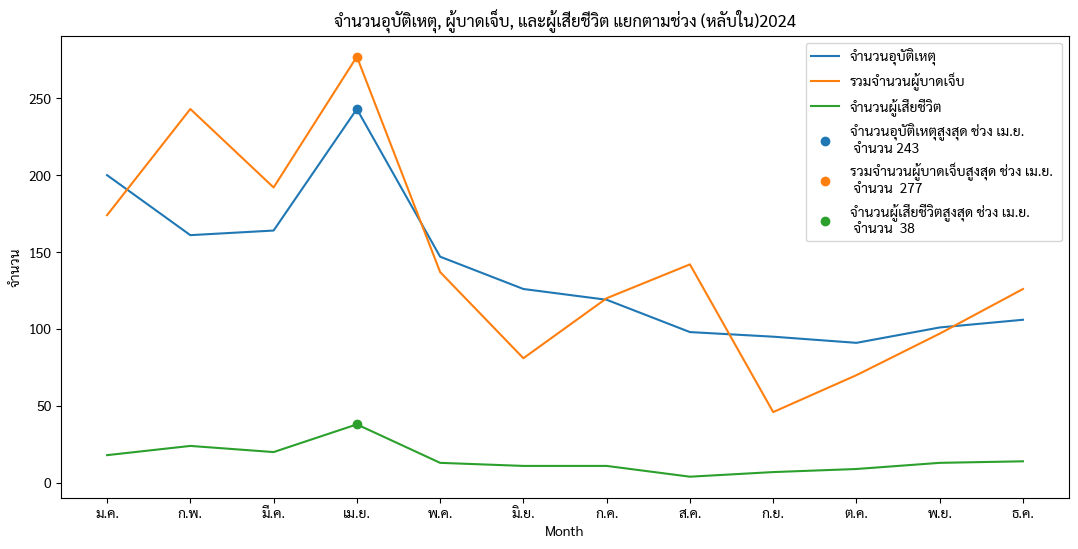

In [ ]:
_filter = ['ขับรถเร็วเกินอัตรากำหนด', 'คน/รถ/สัตว์ตัดหน้ากระชั้นชิด','หลับใน']
thai_months = ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.']
_filter
for filter in _filter:
  df['วันที่เกิดเหตุ'] = pd.to_datetime(df['วันที่เกิดเหตุ'], format='%d/%m/%Y', errors='coerce')

  df['Month'] = df['วันที่เกิดเหตุ'].dt.month
  df_filtered = df[df['มูลเหตุสันนิษฐาน'] == filter]
  # Group by hour and calculate counts for ACC_CODE, sum of 'รวมจำนวนผู้บาดเจ็บ', and sum of 'จำนวนผู้เสียชีวิต'
  hourly_data = df_filtered.groupby('Month').agg({
      'ACC_CODE': 'count',
      'รวมจำนวนผู้บาดเจ็บ': 'sum',
      'จำนวนผู้เสียชีวิต': 'sum'
  })
  max_acc = hourly_data['ACC_CODE'].idxmax()  # ชั่วโมงที่มีจำนวนอุบัติเหตุสูงสุด
  max_injured = hourly_data['รวมจำนวนผู้บาดเจ็บ'].idxmax()  # ชั่วโมงที่มีผู้บาดเจ็บสูงสุด
  max_death = hourly_data['จำนวนผู้เสียชีวิต'].idxmax()  # ชั่วโมงที่มีผู้เสียชีวิตสูงสุด
  # Create the plot

  plt.figure(figsize=(13, 6))
  plt.plot(hourly_data.index, hourly_data['ACC_CODE'], label='จำนวนอุบัติเหตุ')
  plt.plot(hourly_data.index, hourly_data['รวมจำนวนผู้บาดเจ็บ'], label='รวมจำนวนผู้บาดเจ็บ')
  plt.plot(hourly_data.index, hourly_data['จำนวนผู้เสียชีวิต'], label='จำนวนผู้เสียชีวิต')
  # เพิ่มจุดเด่นที่ค่ามากสุด
  plt.scatter(max_acc, hourly_data.loc[max_acc, 'ACC_CODE'], label=f"จำนวนอุบัติเหตุสูงสุด ช่วง {thai_months[max_acc - 1]} \n จำนวน {hourly_data.loc[max_acc, 'ACC_CODE']}", zorder=3)
  plt.scatter(max_injured, hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ'], label=f"รวมจำนวนผู้บาดเจ็บสูงสุด ช่วง {thai_months[max_acc - 1]} \n จำนวน  {hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ']}", zorder=3)
  plt.scatter(max_death, hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต'], label=f"จำนวนผู้เสียชีวิตสูงสุด ช่วง {thai_months[max_acc - 1]} \n จำนวน  {hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต']}", zorder=3)

  # plt.text(max_acc, hourly_data.loc[max_acc, 'ACC_CODE'], f"เวลา {max_acc}.00 \n จำนวน {hourly_data.loc[max_acc, 'ACC_CODE']}",
  #           ha='center', va='bottom', fontsize=10)

  # plt.text(max_injured, hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ'], f"เวลา {max_injured}.00 \n จำนวน  {hourly_data.loc[max_injured, 'รวมจำนวนผู้บาดเจ็บ']}",
  #           ha='center', va='bottom', fontsize=10)

  # plt.text(max_death, hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต'], f"เวลา {max_death}.00 \n จำนวน  {hourly_data.loc[max_death, 'จำนวนผู้เสียชีวิต']}",
  #           ha='center', va='bottom', fontsize=10)
  plt.xlabel('Month')
  plt.ylabel('จำนวน')
  plt.title(f'จำนวนอุบัติเหตุ, ผู้บาดเจ็บ, และผู้เสียชีวิต แยกตามช่วง ({filter})2024')
  plt.legend()



  plt.xticks(list(range(1,13)), thai_months)  # Replace with Thai month labels
  plt.grid(False)
  plt.show()

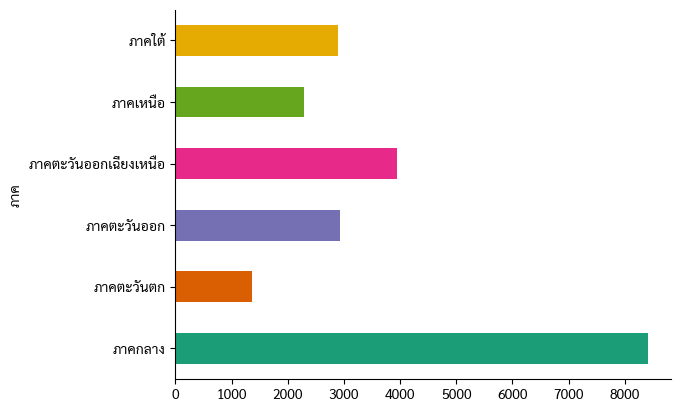

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ภาค').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

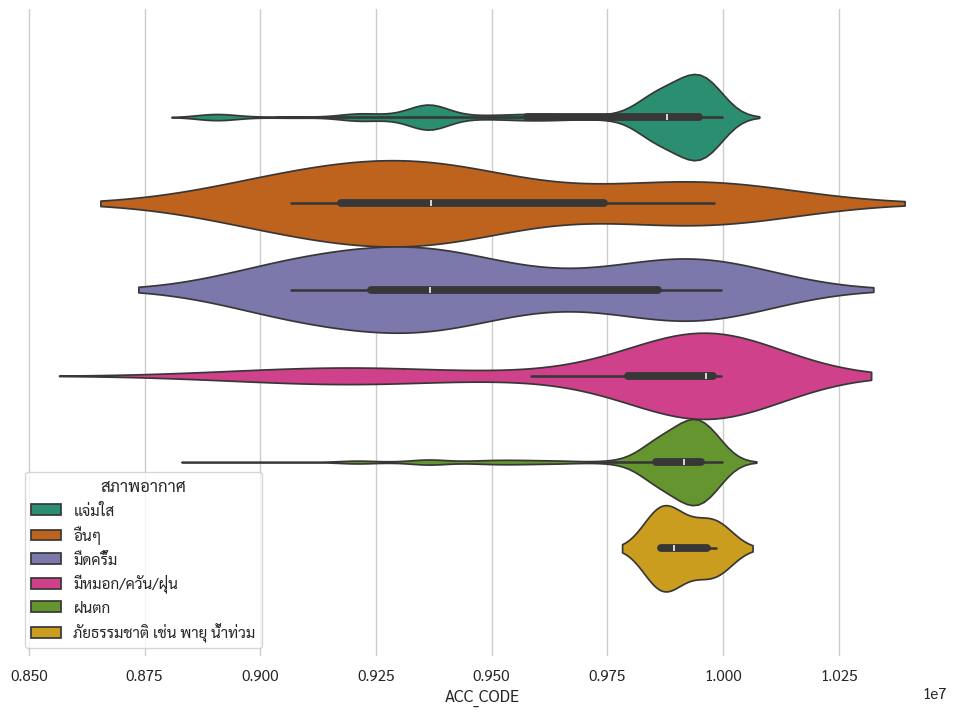

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['สภาพอากาศ'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ACC_CODE', inner='box', palette='Dark2',hue='สภาพอากาศ')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-109-2ebbfef102e6>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['เวลา'] = pd.to_datetime(df['เวลา'], errors='coerce')  # Handle potential errors in datetime conversion


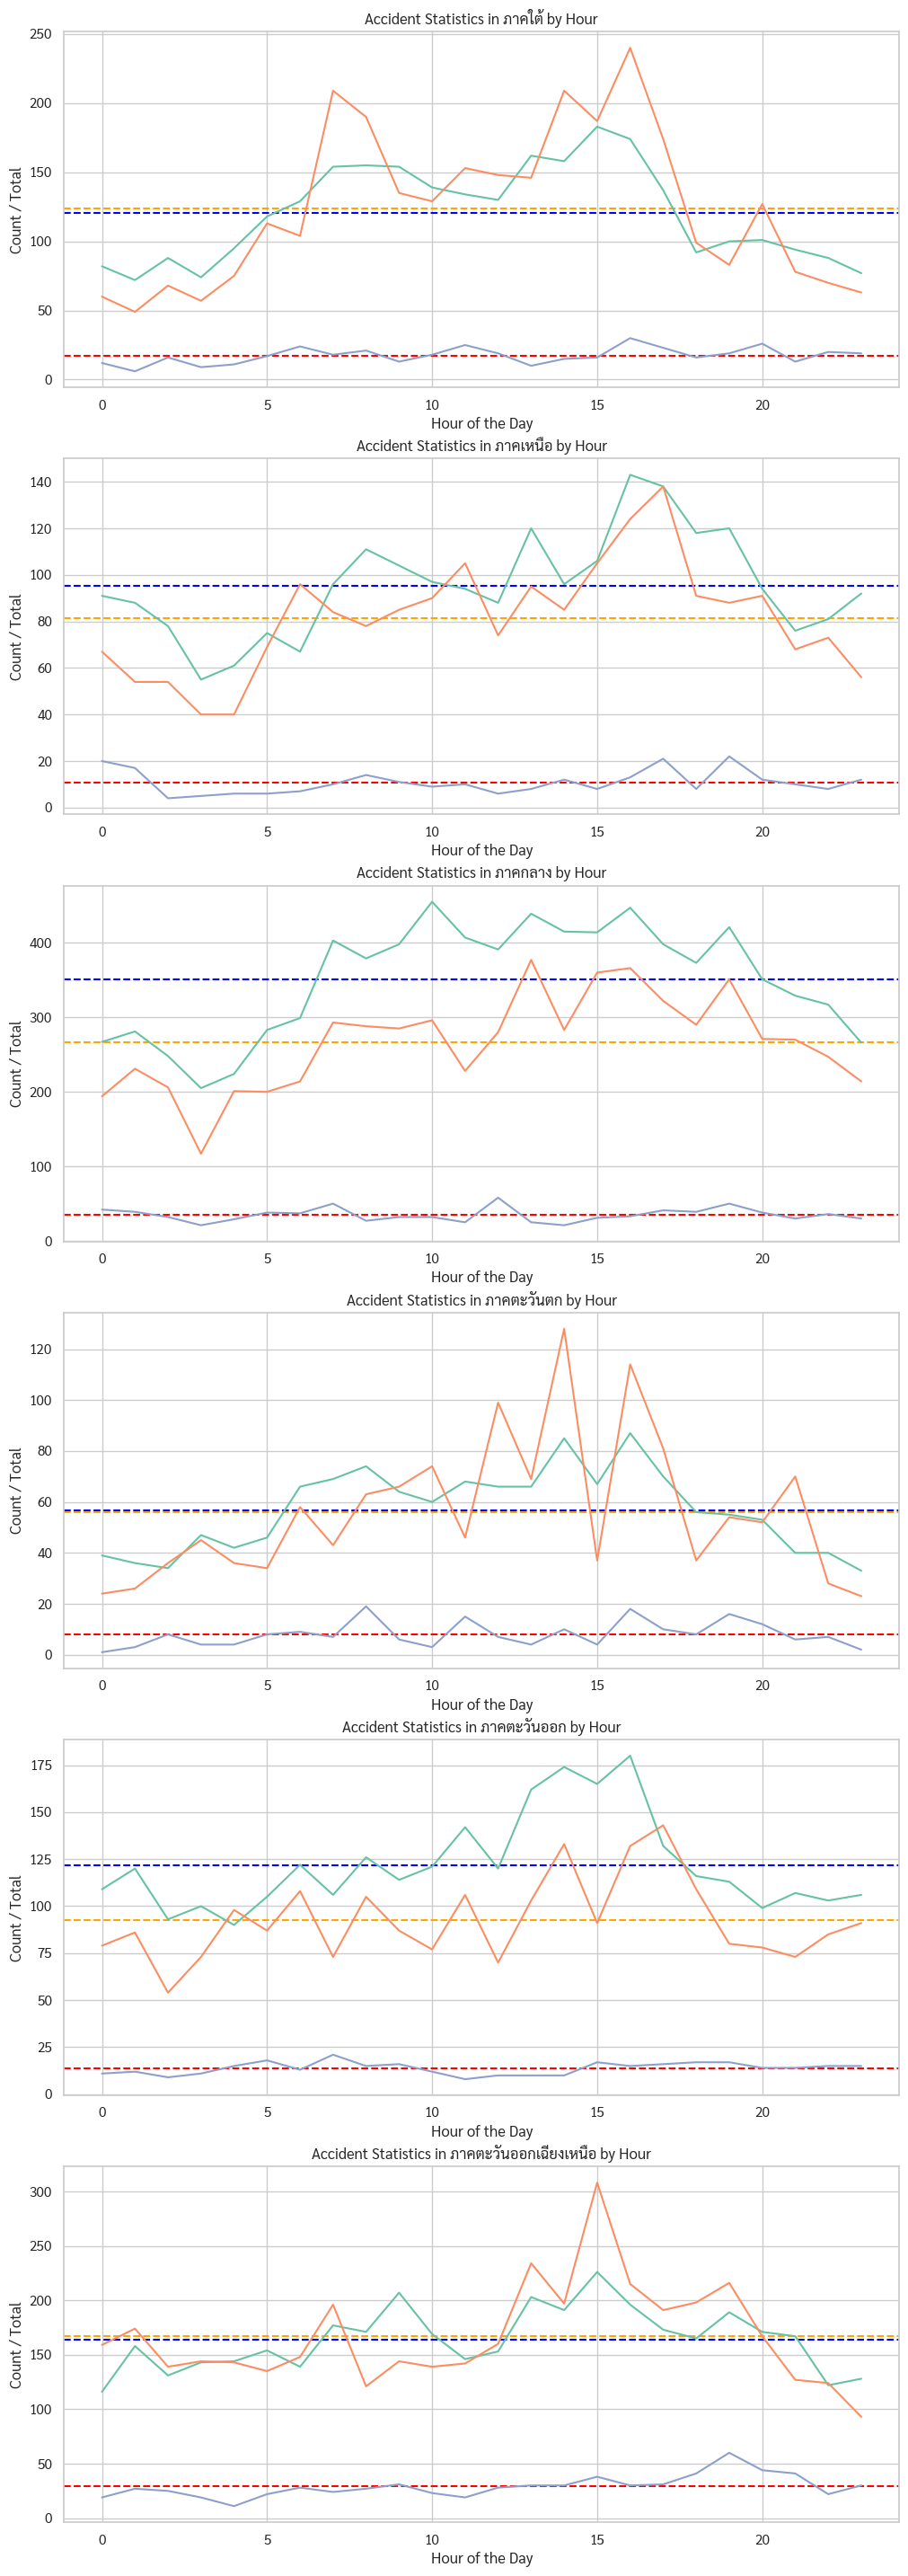

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your DataFrame

# 1. Convert 'เวลา' to datetime objects and extract hour
df['เวลา'] = pd.to_datetime(df['เวลา'], errors='coerce')  # Handle potential errors in datetime conversion
df['Hour'] = df['เวลา'].dt.hour

# 2. Get unique regions
regions = df['ภาค'].unique()

# 3. Create subplots
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6 * len(regions)), sharex=False)

# 4. Iterate through regions and plot
for i, region in enumerate(regions):
    region_data = df[df['ภาค'] == region]

    # Group by hour and calculate metrics
    hourly_data = region_data.groupby('Hour').agg(
        ACC_CODE_Count=('ACC_CODE', 'count'),
        Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
        Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
    )

     # Calculate average values
    avg_acc_count = hourly_data['ACC_CODE_Count'].mean()
    avg_total_injured = hourly_data['Total_Injured'].mean()
    avg_total_deaths = hourly_data['Total_Deaths'].mean()

    # Add horizontal lines for averages
    axes[i].axhline(avg_acc_count, color='blue', linestyle='--', label='Avg Accident Count')
    axes[i].axhline(avg_total_injured, color='orange', linestyle='--', label='Avg Total Injured')
    axes[i].axhline(avg_total_deaths, color='red', linestyle='--', label='Avg Total Deaths')

    # Plotting on the subplot
    axes[i].plot(hourly_data.index, hourly_data['ACC_CODE_Count'], label='Accident Count')
    axes[i].plot(hourly_data.index, hourly_data['Total_Injured'], label='Total Injured')
    axes[i].plot(hourly_data.index, hourly_data['Total_Deaths'], label='Total Deaths')

    # Customize subplot
    axes[i].set_title(f'Accident Statistics in {region} by Hour')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Count / Total')

### 2-1

In [ ]:
hourly_data = df.groupby('มูลเหตุสันนิษฐาน').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})
hourly_data

,ACC_CODE,รวมจำนวนผู้บาดเจ็บ,จำนวนผู้เสียชีวิต
มูลเหตุสันนิษฐาน,,,
การกระทำที่สุ่มเสี่ยงบนถนน,6,4,4
ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แทรคเตอร์),4,2,0
ขับรถคร่อมเส้นแบ่งทิศทาง,4,2,2
ขับรถตามกระชั้นชิด,37,31,6
ขับรถผิดช่องทาง,6,4,3
ขับรถย้อนศร,138,162,64
ขับรถเร็วเกินอัตรากำหนด,15010,12315,1755
ขับรถไม่เปิดไฟ/ไม่ใช้แสงสว่างตามกำหนด,5,6,2
ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่,1,0,1


In [ ]:
# prompt: สร้างpivottable ที่มี index count 'ACC_CODE' ,sum ' รวมจำนวนผู้บาดเจ็บ', sum'จำนวนผู้เสียชีวิต' column pivot table คือ 'มูลเหตุสันนิษฐาน' เรียงลำดับจากมากไปน้อย

# สร้าง pivot table ที่มี index count 'ACC_CODE' ,sum ' รวมจำนวนผู้บาดเจ็บ', sum'จำนวนผู้เสียชีวิต' column pivot table คือ 'มูลเหตุสันนิษฐาน' เรียงลำดับจากมากไปน้อย
pivot_table = df.pivot_table(
    index='มูลเหตุสันนิษฐาน',
    values=['ACC_CODE', 'รวมจำนวนผู้บาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
    aggfunc={'ACC_CODE': 'count', 'รวมจำนวนผู้บาดเจ็บ': 'sum', 'จำนวนผู้เสียชีวิต': 'sum'}
)

# เรียงลำดับ pivot table จากมากไปน้อยตาม 'ACC_CODE'
pivot_table = pivot_table.sort_values('ACC_CODE', ascending=False)

pivot_table.T


มูลเหตุสันนิษฐาน,ขับรถเร็วเกินอัตรากำหนด,หลับใน,คน/รถ/สัตว์ตัดหน้ากระชั้นชิด,ยางเสื่อมสภาพ/ยางแตก,ถนนลื่น,เมาสุรา,ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร,สูญเสียการควบคุม,ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ,ขับรถย้อนศร,...,ทำงานบนถนน,ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แทรคเตอร์),ระบบบังคับเลี้ยวขัดข้อง,ป้ายจราจรถูกบดบัง,ถนนแคบ,ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่,รถเสียไม่แสดงเครื่องหมาย/สัญญาณตามที่กำหนด,มึนเมาจากแอลกอฮอล์,มีสิ่งรบกวนภายนอกรถ,ระยะปลอดภัยข้างทางไม่เพียงพอ
ACC_CODE,15010,1651,1492,606,511,297,184,167,143,138,...,4,4,4,2,1,1,1,1,1,1
จำนวนผู้เสียชีวิต,1755,182,322,17,47,64,41,19,17,64,...,7,0,0,0,0,1,0,1,0,0
รวมจำนวนผู้บาดเจ็บ,12315,1705,1744,418,368,292,273,197,167,162,...,11,2,2,2,1,0,2,0,0,2


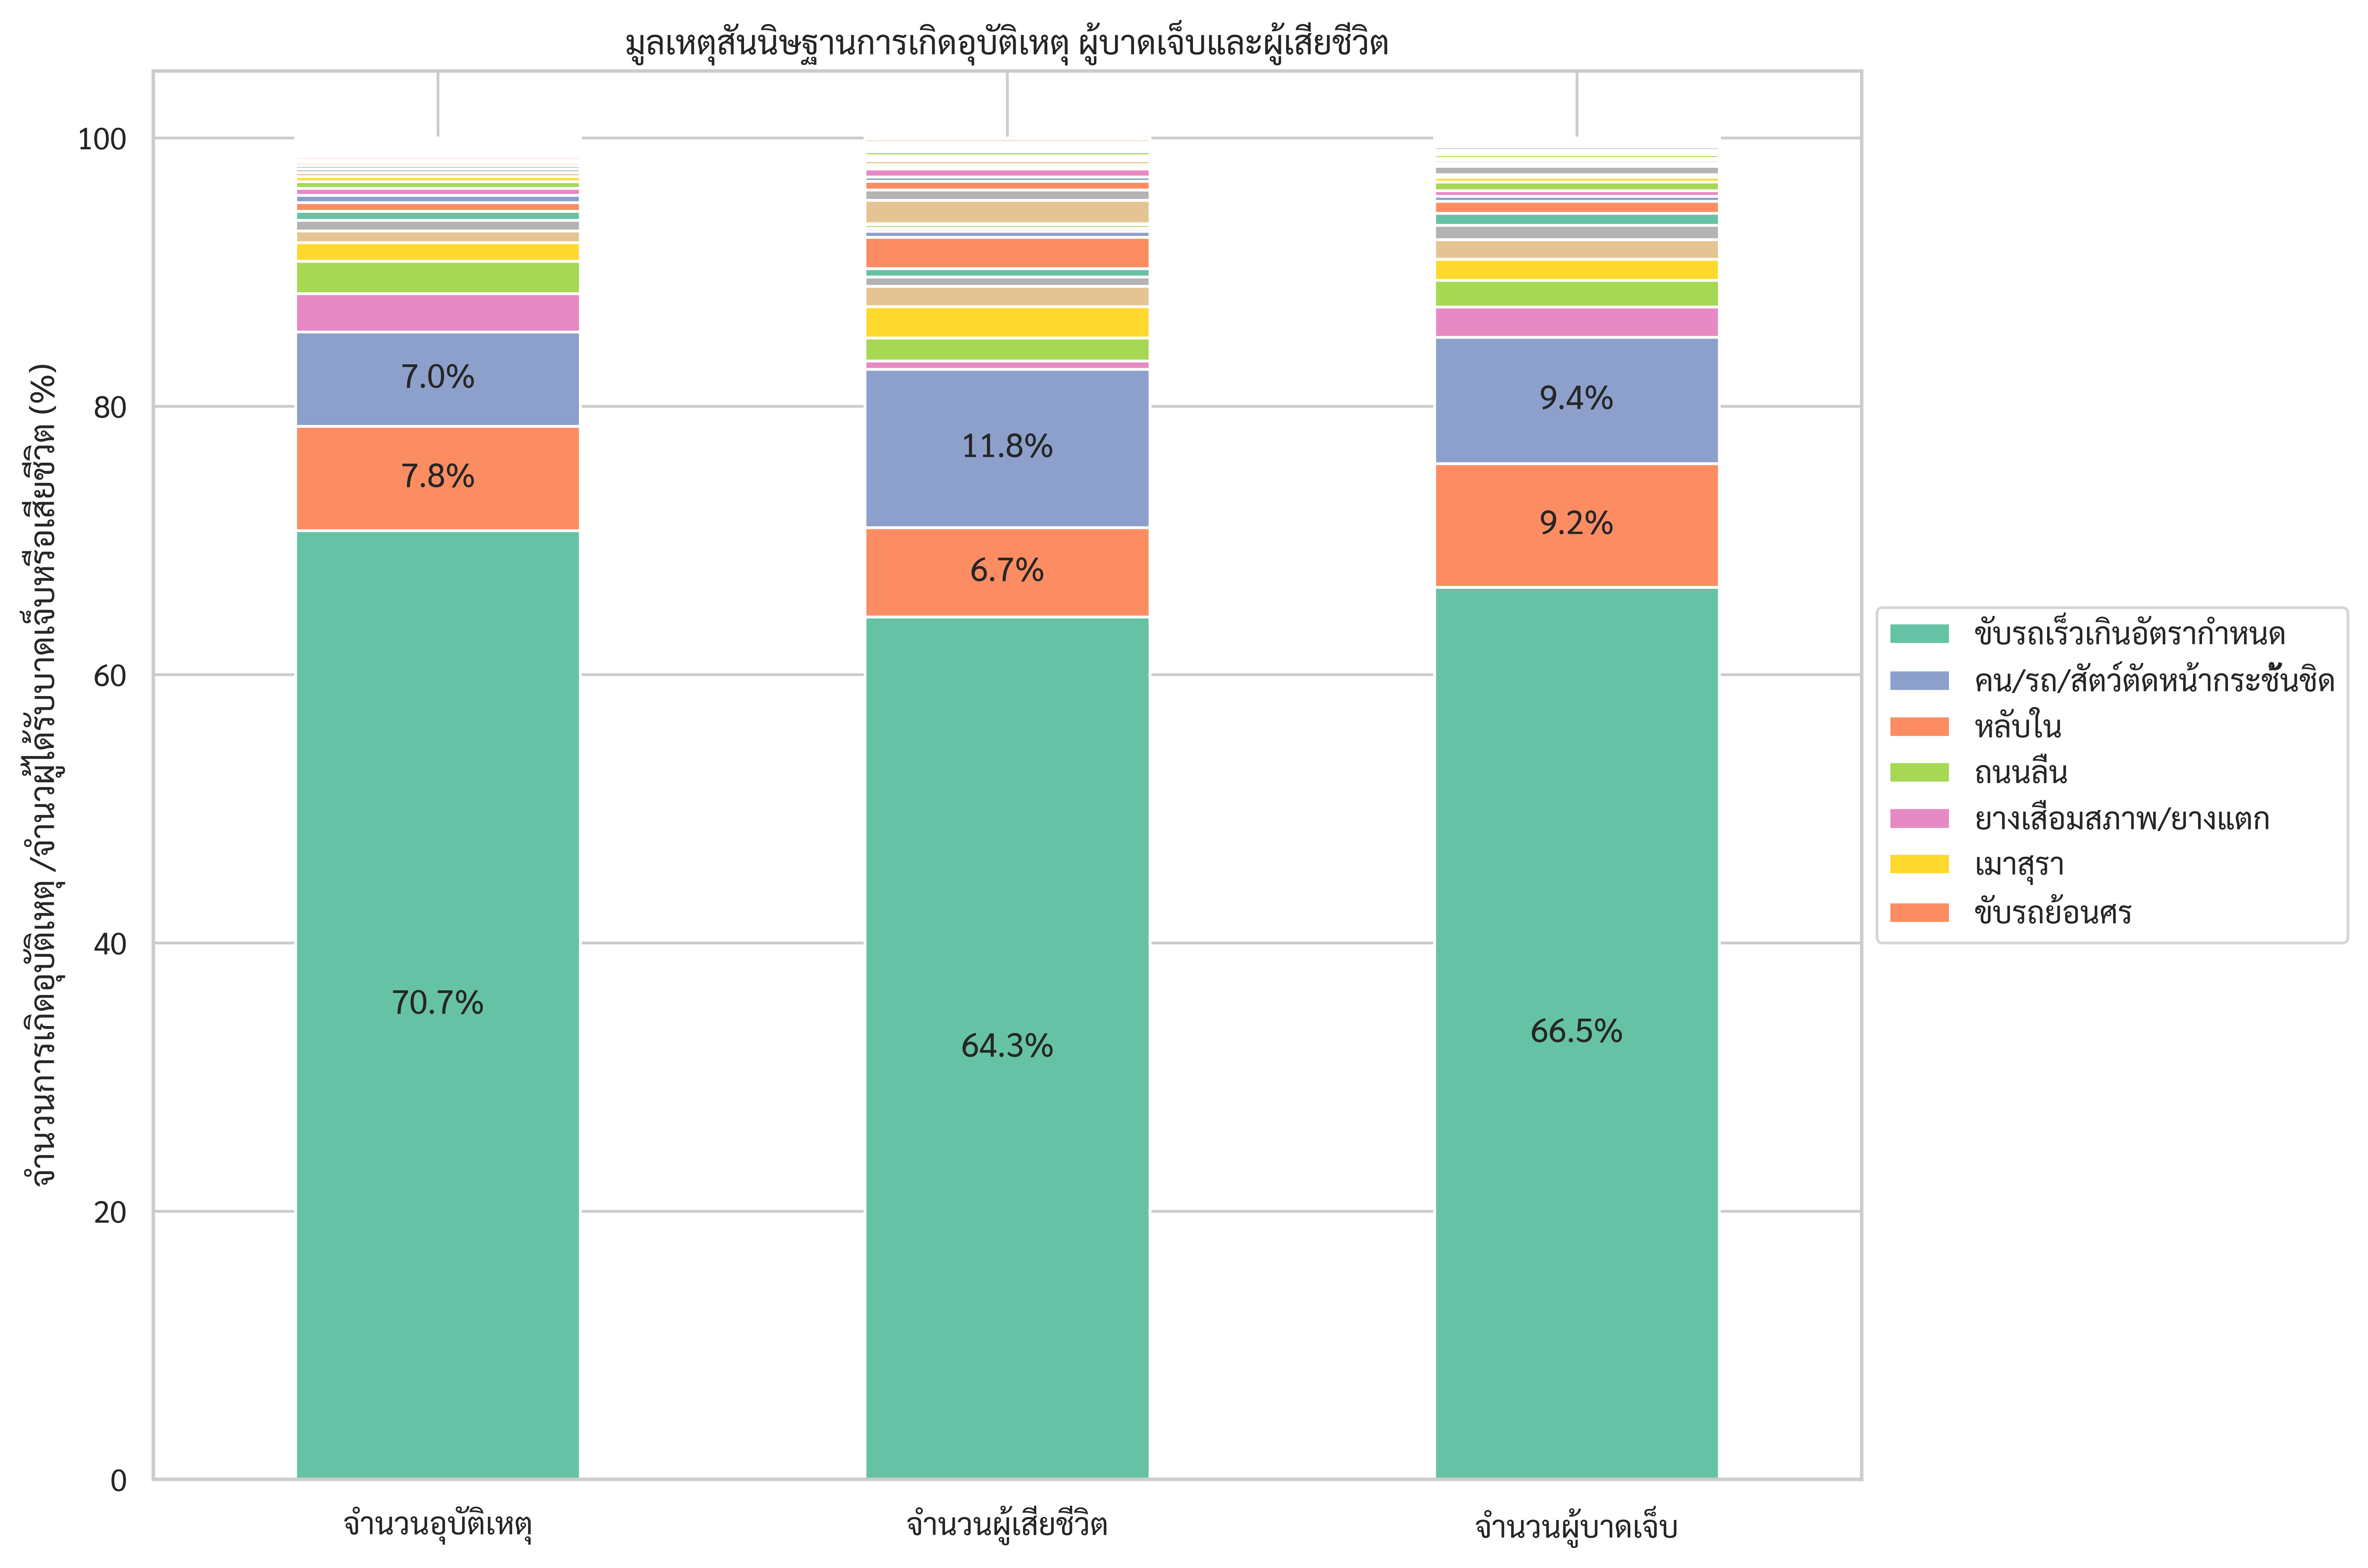

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Transpose the pivot table to have categories as columns
pivot_table_transposed = pivot_table.T

# Calculate percentage values for each category within each group
percentage_values = pivot_table_transposed.div(pivot_table_transposed.sum(axis=1), axis=0) * 100
fig, ax2 = plt.subplots(figsize=(12, 8), dpi=600)  # Set dpi here for the figure
# Create the 100% stacked bar chart
ax = percentage_values.plot(kind='bar', stacked=True, ax=ax2)

# Customize the chart

plt.title('มูลเหตุสันนิษฐานการเกิดอุบัติเหตุ ผู้บาดเจ็บและผู้เสียชีวิต')
#plt.xlabel('Categories')
plt.ylabel('จำนวนการเกิดอุบัติเหตุ /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (%)')
plt.xticks()

# Get handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Sort labels based on total percentage (sum across all groups)
label_order = percentage_values.sum().sort_values(ascending=False).index

# Select the top 5 labels and corresponding handles
top_5_labels = label_order[:7]
top_5_handles = [handles[labels.index(label)] for label in top_5_labels]

# Create a new legend with only the top 5 entries
ax.legend(top_5_handles, top_5_labels, title='', loc='center left', bbox_to_anchor=(1, 0.5))

# Add percentage labels inside the bars (optional)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height >= 3:
        ax.text(x + width / 2,
                y + height / 2,
                '{:.1f}%'.format(height),
                ha='center', va='center')

current_xticks = plt.xticks()[0]
plt.xticks(current_xticks, ['จำนวนอุบัติเหตุ', 'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บ'])
#plt.xticks(['ACC_CODE','จำนวนผู้เสียชีวิต','รวมจำนวนผู้บาดเจ็บ'], ['จำนวนผู้บาดเจ็บ', 'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บ'])
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

### 2-1: วิเคราะห์อุบัติเหตุจากมูลเหตุสันนิษฐาน (Presumed Causes)

##### 🔍 Analysis Objective  
- วิเคราะห์ว่าอุบัติเหตุจากสาเหตุแต่ละประเภท เช่น *ขับรถเร็ว*, *หลับใน* ส่งผลรุนแรงต่างกันอย่างไร

##### 📊 Visualization  
- ใช้ **Grouped Bar Chart** เปรียบเทียบอุบัติเหตุ บาดเจ็บ และเสียชีวิตในแต่ละมูลเหตุ

##### 📌 Expected Insights  
- สาเหตุแบบไหนที่เกิดอุบัติเหตุบ่อย  
- สาเหตุแบบไหนที่แม้จะเกิดน้อย แต่ถ้าเกิดแล้วมักรุนแรง  

เพื่อช่วยระบุพฤติกรรมเสี่ยงที่ควรได้รับความสำคัญในการแก้ไขอย่างตรงจุด

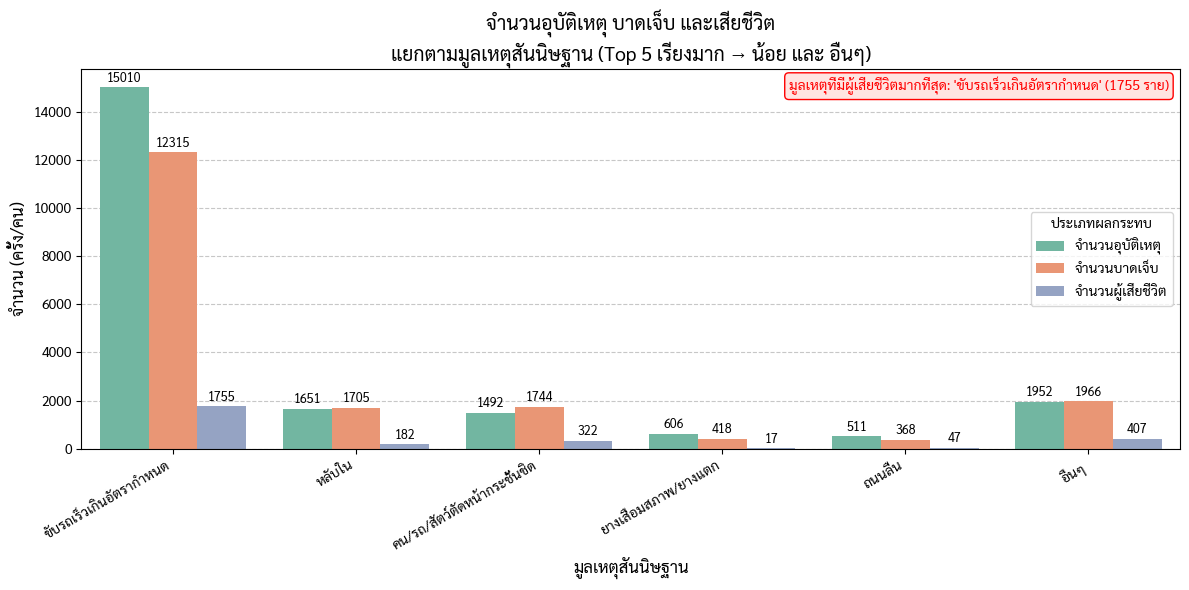

In [ ]:
# 2-1
# สร้าง summary โดยรวมข้อมูลตามมูลเหตุสันนิษฐาน
summary = df.groupby('มูลเหตุสันนิษฐาน').agg({
    'ACC_CODE': 'count',
    'จำนวนผู้บาดเจ็บสาหัส': 'sum',
    'จำนวนผู้บาดเจ็บเล็กน้อย': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
}).rename(columns={'ACC_CODE': 'จำนวนอุบัติเหตุ'})

# รวมจำนวนบาดเจ็บ
summary["จำนวนบาดเจ็บ"] = summary["จำนวนผู้บาดเจ็บสาหัส"] + summary["จำนวนผู้บาดเจ็บเล็กน้อย"]

# สร้างคอลัมน์ใหม่: มูลเหตุ_จำแนก (Top 5 + อื่นๆ)
top5_causes = summary.sort_values(by="จำนวนอุบัติเหตุ", ascending=False).head(5).index.tolist()
summary["มูลเหตุ_จำแนก"] = summary.index.map(lambda x: x if x in top5_causes else "อื่นๆ")

# รวมกลุ่มใหม่ตามมูลเหตุ_จำแนก
summary_sorted = summary.groupby("มูลเหตุ_จำแนก")[["จำนวนอุบัติเหตุ", "จำนวนบาดเจ็บ", "จำนวนผู้เสียชีวิต"]].sum().reset_index()

# Melt ข้อมูลให้อยู่ในรูปแบบ long format
df_melted_sorted = summary_sorted.melt(
    id_vars="มูลเหตุ_จำแนก",
    value_vars=["จำนวนอุบัติเหตุ", "จำนวนบาดเจ็บ", "จำนวนผู้เสียชีวิต"],
    var_name="ประเภทผลกระทบ",
    value_name="จำนวน"
)

# จัดลำดับแกน X: เรียง main_causes จากมาก → น้อย และตามด้วย "อื่นๆ"
others = summary_sorted[summary_sorted["มูลเหตุ_จำแนก"] == "อื่นๆ"]
main_causes_df = summary_sorted[summary_sorted["มูลเหตุ_จำแนก"] != "อื่นๆ"]
main_causes_sorted = main_causes_df.sort_values(by="จำนวนอุบัติเหตุ", ascending=False)
x_order = main_causes_sorted["มูลเหตุ_จำแนก"].tolist()
if not others.empty:
    x_order += others["มูลเหตุ_จำแนก"].tolist()

# วาดกราฟ
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")

ax = sns.barplot(
    data=df_melted_sorted,
    x="มูลเหตุ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

# เพิ่มตัวเลขบนแท่ง
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)

# ตกแต่งเพิ่มเติม
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.title("จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต\nแยกตามมูลเหตุสันนิษฐาน (Top 5 เรียงมาก → น้อย และ อื่นๆ)", fontsize=14)
plt.xlabel("มูลเหตุสันนิษฐาน", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='center right')

# เพิ่มคำอธิบายเด่นบนกราฟ
try:
    max_fatal_cause = summary_sorted.loc[summary_sorted["จำนวนผู้เสียชีวิต"].idxmax(), "มูลเหตุ_จำแนก"]
    max_fatal_value = summary_sorted["จำนวนผู้เสียชีวิต"].max()
    note = f"มูลเหตุที่มีผู้เสียชีวิตมากที่สุด: '{max_fatal_cause}' ({max_fatal_value} ราย)"
    plt.text(0.99, 0.98, note, transform=plt.gca().transAxes,
             fontsize=10, color="red", ha="right", va="top",
             bbox=dict(facecolor="mistyrose", edgecolor="red", boxstyle="round,pad=0.3"))
except:
    pass

plt.tight_layout()
plt.show()

### 3-1: วิเคราะห์อุบัติเหตุจากประเภทรถต้นเหตุ (Vehicle Type)

##### 🎯 Analysis Objective
- เพื่อเปรียบเทียบระดับความรุนแรงของอุบัติเหตุในแต่ละประเภทรถ

##### 📊 Visualization  
- ใช้ **Grouped Bar Chart** เปรียบเทียบอุบัติเหตุ บาดเจ็บ และเสียชีวิตในแต่ละประเภทรถ

##### 📌 Expected Insights  
- รถประเภทใดที่เกิดอุบัติเหตุบ่อยที่สุด
- รถประเภทใดที่ “อันตราย” แม้จะเกิดอุบัติเหตุไม่บ่อย  
- ใช้ข้อมูลประกอบเพื่อวางนโยบายป้องกันอุบัติเหตุอย่างตรงจุด

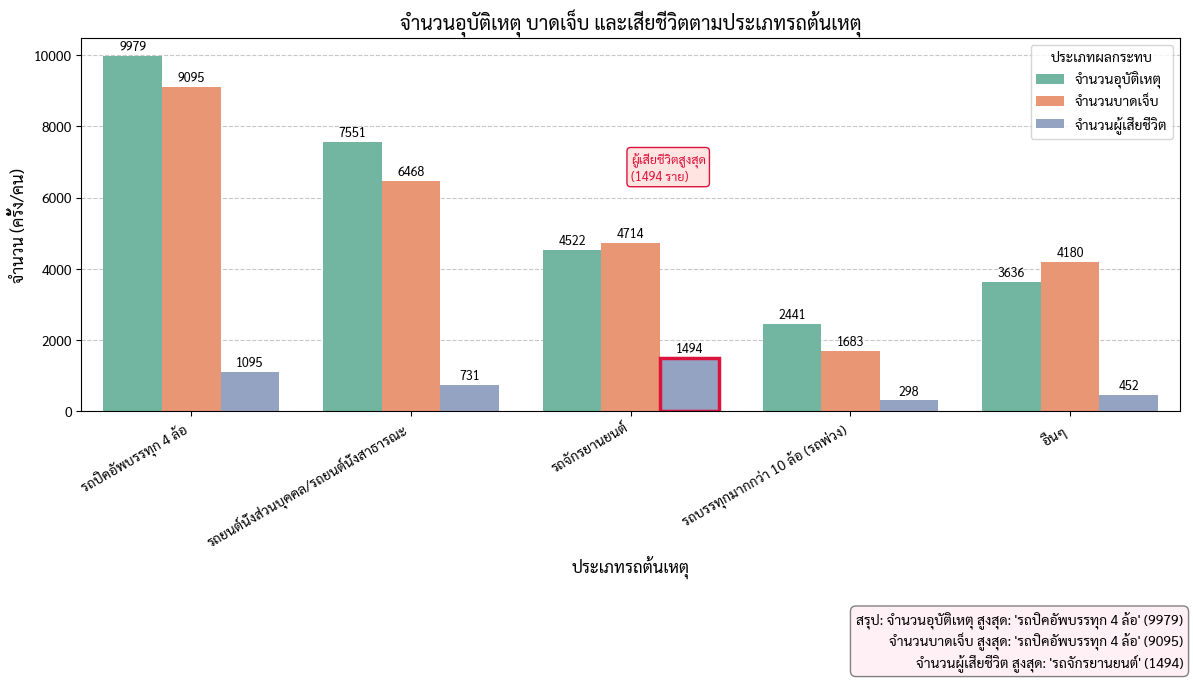

In [ ]:
#3-1
# ระบุคอลัมน์ประเภทรถต้นเหตุที่ต้องวิเคราะห์
vehicle_cols = [
    'รถจักรยานยนต์',
    'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ',
    'รถปิคอัพบรรทุก 4 ล้อ',
    'รถตู้',
    'รถบรรทุก 6 ล้อ',
    'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)',
    'อื่นๆ'
]

# สร้าง summary
vehicle_summary = pd.DataFrame(index=vehicle_cols)
vehicle_summary['จำนวนอุบัติเหตุ'] = df[vehicle_cols].apply(lambda col: (col > 0).sum())

vehicle_summary['จำนวนบาดเจ็บ'] = [
    df.loc[df[vc] > 0, 'จำนวนผู้บาดเจ็บสาหัส'].sum() +
    df.loc[df[vc] > 0, 'จำนวนผู้บาดเจ็บเล็กน้อย'].sum()
    for vc in vehicle_cols
]

vehicle_summary['จำนวนผู้เสียชีวิต'] = [
    df.loc[df[vc] > 0, 'จำนวนผู้เสียชีวิต'].sum()
    for vc in vehicle_cols
]

vehicle_summary = vehicle_summary.reset_index().rename(columns={'index': 'ประเภทรถต้นเหตุ'})

# ✅ แยก Top 5 + อื่นๆ
top5_vehicles = vehicle_summary.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).head(5)['ประเภทรถต้นเหตุ'].tolist()
vehicle_summary['รถ_จำแนก'] = vehicle_summary['ประเภทรถต้นเหตุ'].apply(lambda x: x if x in top5_vehicles else 'อื่นๆ')

# รวมกลุ่มใหม่
grouped_vehicle = vehicle_summary.groupby('รถ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].sum().reset_index()

# Melt สำหรับ seaborn
vehicle_melted_top5 = grouped_vehicle.melt(
    id_vars='รถ_จำแนก',
    value_vars=['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
    var_name='ประเภทผลกระทบ', value_name='จำนวน'
)

# ✅ จัดลำดับ: เรียงตามจำนวนอุบัติเหตุ และเอา "อื่นๆ" ไว้ท้าย
x_order = grouped_vehicle.sort_values(by='จำนวนอุบัติเหตุ', ascending=False)['รถ_จำแนก'].tolist()
others = [x for x in x_order if 'อื่น' in x]
main_labels = [x for x in x_order if x not in others]
x_order = main_labels + others

# 🔍 สร้างคำอธิบายไฮไลท์อัตโนมัติ
highlight_texts = []
for impact_type in ['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']:
    df_filtered = vehicle_melted_top5[
        (vehicle_melted_top5['ประเภทผลกระทบ'] == impact_type) &
        (vehicle_melted_top5['รถ_จำแนก'].isin(main_labels))
    ]
    max_row = df_filtered[df_filtered['จำนวน'] == df_filtered['จำนวน'].max()].iloc[0]
    highlight_texts.append(f"{impact_type} สูงสุด: '{max_row['รถ_จำแนก']}' ({int(max_row['จำนวน'])})")

# 🎨 วาดกราฟ
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")

ax = sns.barplot(
    data=vehicle_melted_top5,
    x="รถ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

#for bar in ax.containers:
#    for patch in bar:
#       if patch.get_height() == highlight_value:
#           patch.set_facecolor("crimson")

# ✅ ไฮไลท์เฉพาะแท่งที่ต้องการด้วย "ขอบสีแดง"
for bar in ax.containers:
    for patch in bar:
        if patch.get_height() == highlight_value:
            patch.set_edgecolor("crimson")
            patch.set_linewidth(2.5)

# ใส่ตัวเลขบนแท่ง
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)
    #ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge", fontsize=9, padding=2)
    #ax.bar_label(ax.containers[1], fmt="%.0f", label_type="edge", fontsize=9, padding=2)
    #ax.bar_label(ax.containers[2], fmt="%.0f", label_type="edge", fontsize=9, padding=2)

# Grid + แกน
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิตตามประเภทรถต้นเหตุ", fontsize=14)
plt.xlabel("ประเภทรถต้นเหตุ", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='upper right')

# ✅ เพิ่มคำอธิบายอัตโนมัติใต้กราฟ
highlight_note = "\n".join(highlight_texts)
plt.figtext(0.99, -0.12, f"สรุป: {highlight_note}", ha='right', fontsize=10,
            bbox=dict(facecolor='lavenderblush', edgecolor='gray', boxstyle='round,pad=0.4'))

# ✅ ปัก Insight บนกราฟ
plt.text(
    x=x_order.index(highlight_x),
    y=highlight_value + 5000,
    s=f"ผู้เสียชีวิตสูงสุด\n({highlight_value} ราย)",
    ha='left',
    fontsize=9,
    fontweight='bold',
    color='crimson',
    bbox=dict(facecolor='mistyrose', edgecolor='crimson', boxstyle='round,pad=0.3')
)

plt.tight_layout()
plt.show()

### 3-2: วิเคราะห์อุบัติเหตุจากประเภทบริเวณที่เกิดเหตุ (Road Location Types)
##### 🎯 Analysis Objective:
- เพื่อดูว่าพื้นที่แบบไหน (ทางตรง ทางโค้ง ลาดชัน ฯลฯ) มีแนวโน้มเกิดอุบัติเหตุและความรุนแรงมากน้อยเพียงใด

##### 📊 Visualization:
- ใช้ **Grouped Bar Chart** เปรียบเทียบจำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต
- ไฮไลท์จุดที่รุนแรง เช่น ทางโค้งที่มีบาดเจ็บสูง

##### 📌 Expected Insights:
- ช่วยชี้เป้าจุดที่ควรมีมาตรการป้องกันเฉพาะ เช่น ป้ายเตือน ราวกันตก ฯลฯ

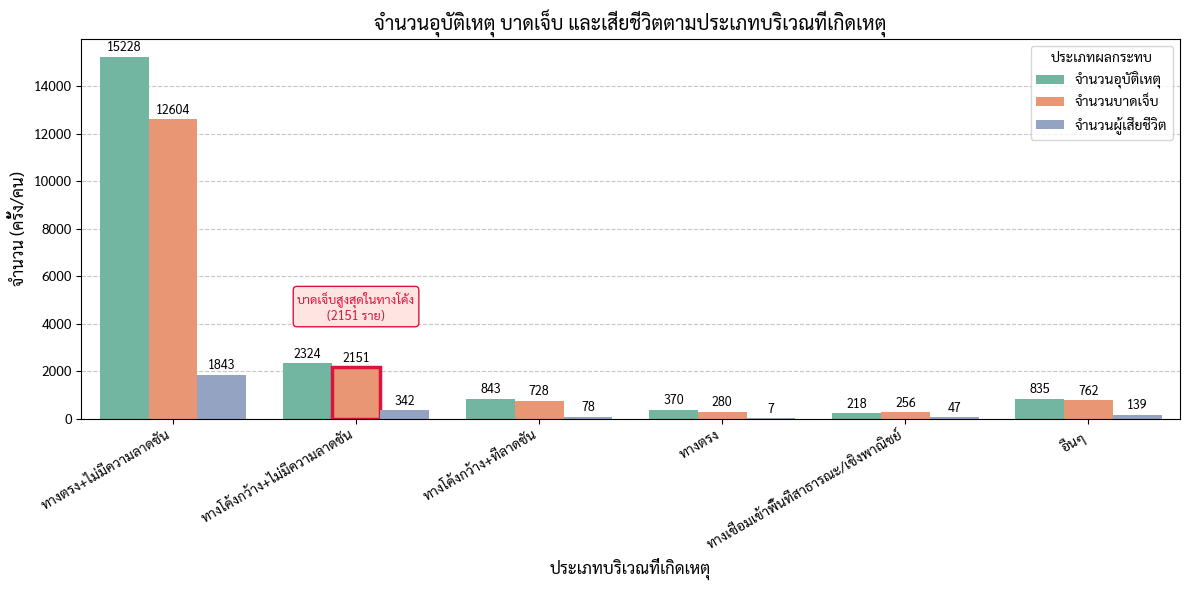

In [ ]:
# เตรียมข้อมูล: คำนวณสรุปจำนวนอุบัติเหตุ บาดเจ็บ เสียชีวิต ตามประเภทบริเวณที่เกิดเหตุ
place_col = 'บริเวณที่เกิดเหตุ/ลักษณะทาง'
df_place = df.dropna(subset=[place_col])

place_summary = df_place.groupby(place_col).agg({
    'ACC_CODE': 'count',
    'จำนวนผู้บาดเจ็บสาหัส': 'sum',
    'จำนวนผู้บาดเจ็บเล็กน้อย': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
}).rename(columns={'ACC_CODE': 'จำนวนอุบัติเหตุ'})

place_summary['จำนวนบาดเจ็บ'] = place_summary['จำนวนผู้บาดเจ็บสาหัส'] + place_summary['จำนวนผู้บาดเจ็บเล็กน้อย']
place_summary = place_summary[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].reset_index()

# คัด Top 5 แล้วรวมเป็น "อื่นๆ"
top5_places = place_summary.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).head(5)[place_col].tolist()
place_summary['บริเวณ_จำแนก'] = place_summary[place_col].apply(lambda x: x if x in top5_places else 'อื่นๆ')

# รวมกลุ่มใหม่
grouped_place = place_summary.groupby('บริเวณ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].sum().reset_index()

# Melt สำหรับ seaborn
place_melted = grouped_place.melt(
    id_vars='บริเวณ_จำแนก',
    value_vars=['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
    var_name='ประเภทผลกระทบ', value_name='จำนวน'
)

# เรียงแกน X โดยเอา "อื่นๆ" ไว้ท้าย
x_order = grouped_place.sort_values(by='จำนวนอุบัติเหตุ', ascending=False)['บริเวณ_จำแนก'].tolist()
others = [x for x in x_order if 'อื่น' in x]
main_labels = [x for x in x_order if x not in others]
x_order = main_labels + others

# หาค่าที่ต้องไฮไลท์
curve_injuries = grouped_place[grouped_place['บริเวณ_จำแนก'].str.contains('โค้ง')]
highlight_curve_label = curve_injuries.loc[curve_injuries['จำนวนบาดเจ็บ'].idxmax(), 'บริเวณ_จำแนก']
highlight_curve_value = curve_injuries['จำนวนบาดเจ็บ'].max()

# วาดกราฟพร้อมไฮไลท์
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
ax = sns.barplot(
    data=place_melted,
    x="บริเวณ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

# ใส่ตัวเลขบนแท่ง
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)

# ไฮไลท์ "จำนวนบาดเจ็บ" ใน "ทางโค้ง"
for bar in ax.containers:
    for patch in bar:
        if patch.get_height() == highlight_curve_value:
            patch.set_edgecolor("crimson")
            patch.set_linewidth(2.5)

# ปักป้ายข้อความ
plt.text(
    x=x_order.index(highlight_curve_label),
    y=highlight_curve_value + 2000,
    s=f"บาดเจ็บสูงสุดในทางโค้ง\n({highlight_curve_value} ราย)",
    ha='center',
    fontsize=9,
    fontweight='bold',
    color='crimson',
    bbox=dict(facecolor='mistyrose', edgecolor='crimson', boxstyle='round,pad=0.3')
)

# ปรับกราฟ
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.title("จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิตตามประเภทบริเวณที่เกิดเหตุ", fontsize=14)
plt.xlabel("ประเภทบริเวณที่เกิดเหตุ", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='upper right')

plt.tight_layout()
plt.show()
